# Highest-Paid Software Developer - Charts
![](images/years_coding.png)

Use the code below to generate the visualizations from "[Meet Dev, the Highest-Paid Software Developer in America](https://whoisnnamdi.com/highest-paid-software-developer/)"

Reads in "results.csv" and outputs custom charts for each category.

Unfortunately cannot write and reuse one flexible function as each chart requires meaningful customization, in part due to certain oddities of Matplotlib.

Must first run "dev_pay.ipynb" or "dev_pay.py" to run regressions and generate "results.csv".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results_df = pd.read_csv("results.csv", low_memory=False)
results_df = results_df.set_index("Unnamed: 0", drop = True)
results_df.rename_axis(None, inplace=True)

plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['errorbar.capsize'] = 3

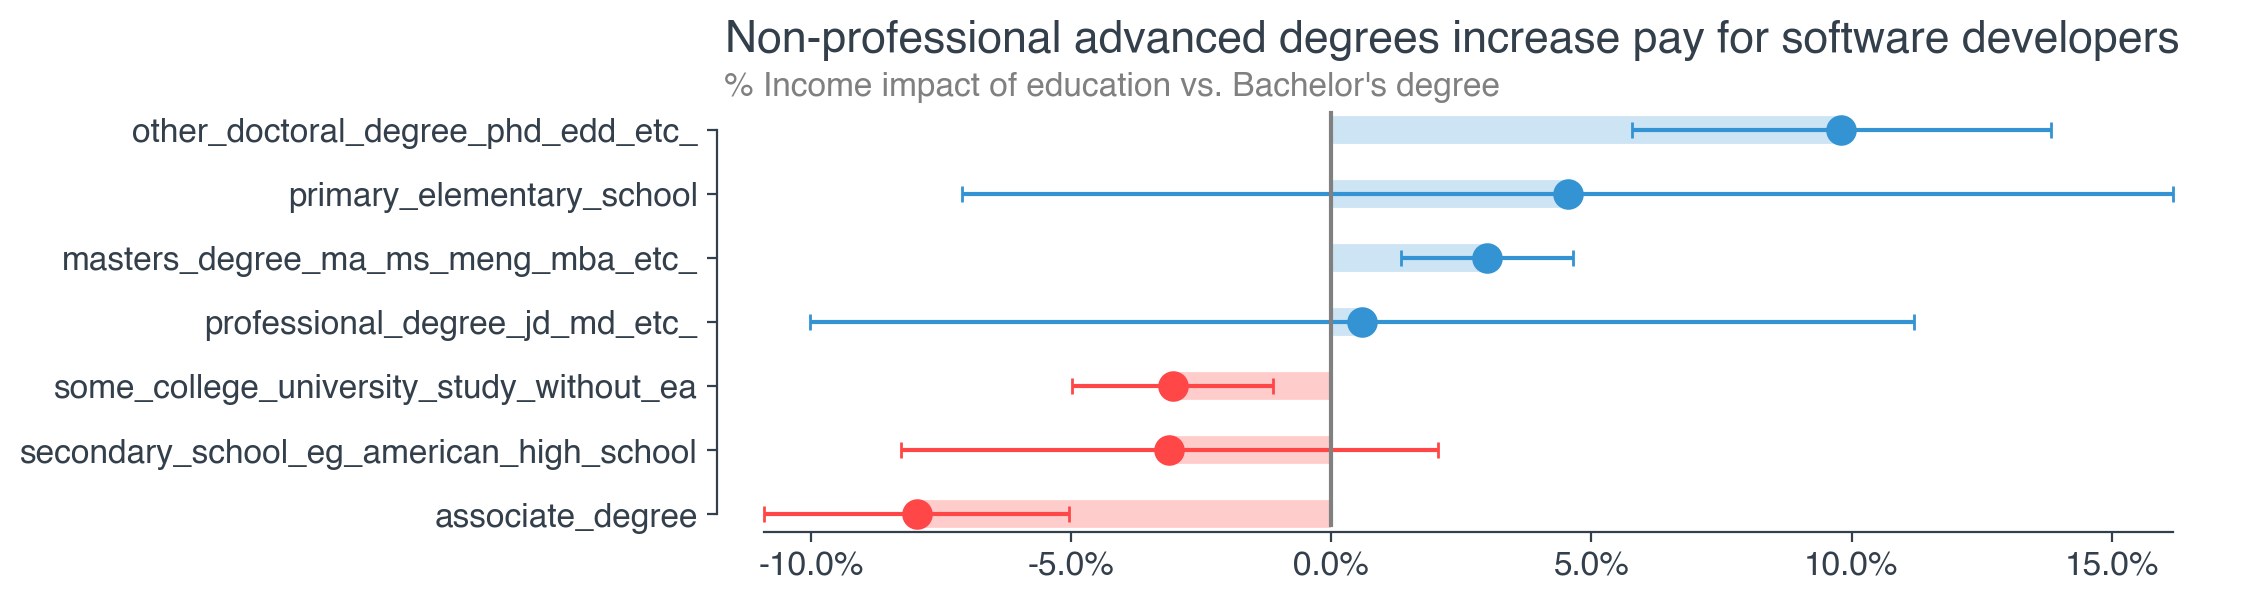

In [2]:
category = "FormalEducation"
category_clean = "Highest Level of Education Reached"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits.remove("FormalEducation_no_answer")
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Non-professional advanced degrees increase pay for software developers", x = 0.02, y = 1.1, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of education vs. Bachelor's degree", x = 0.14, y = .95, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

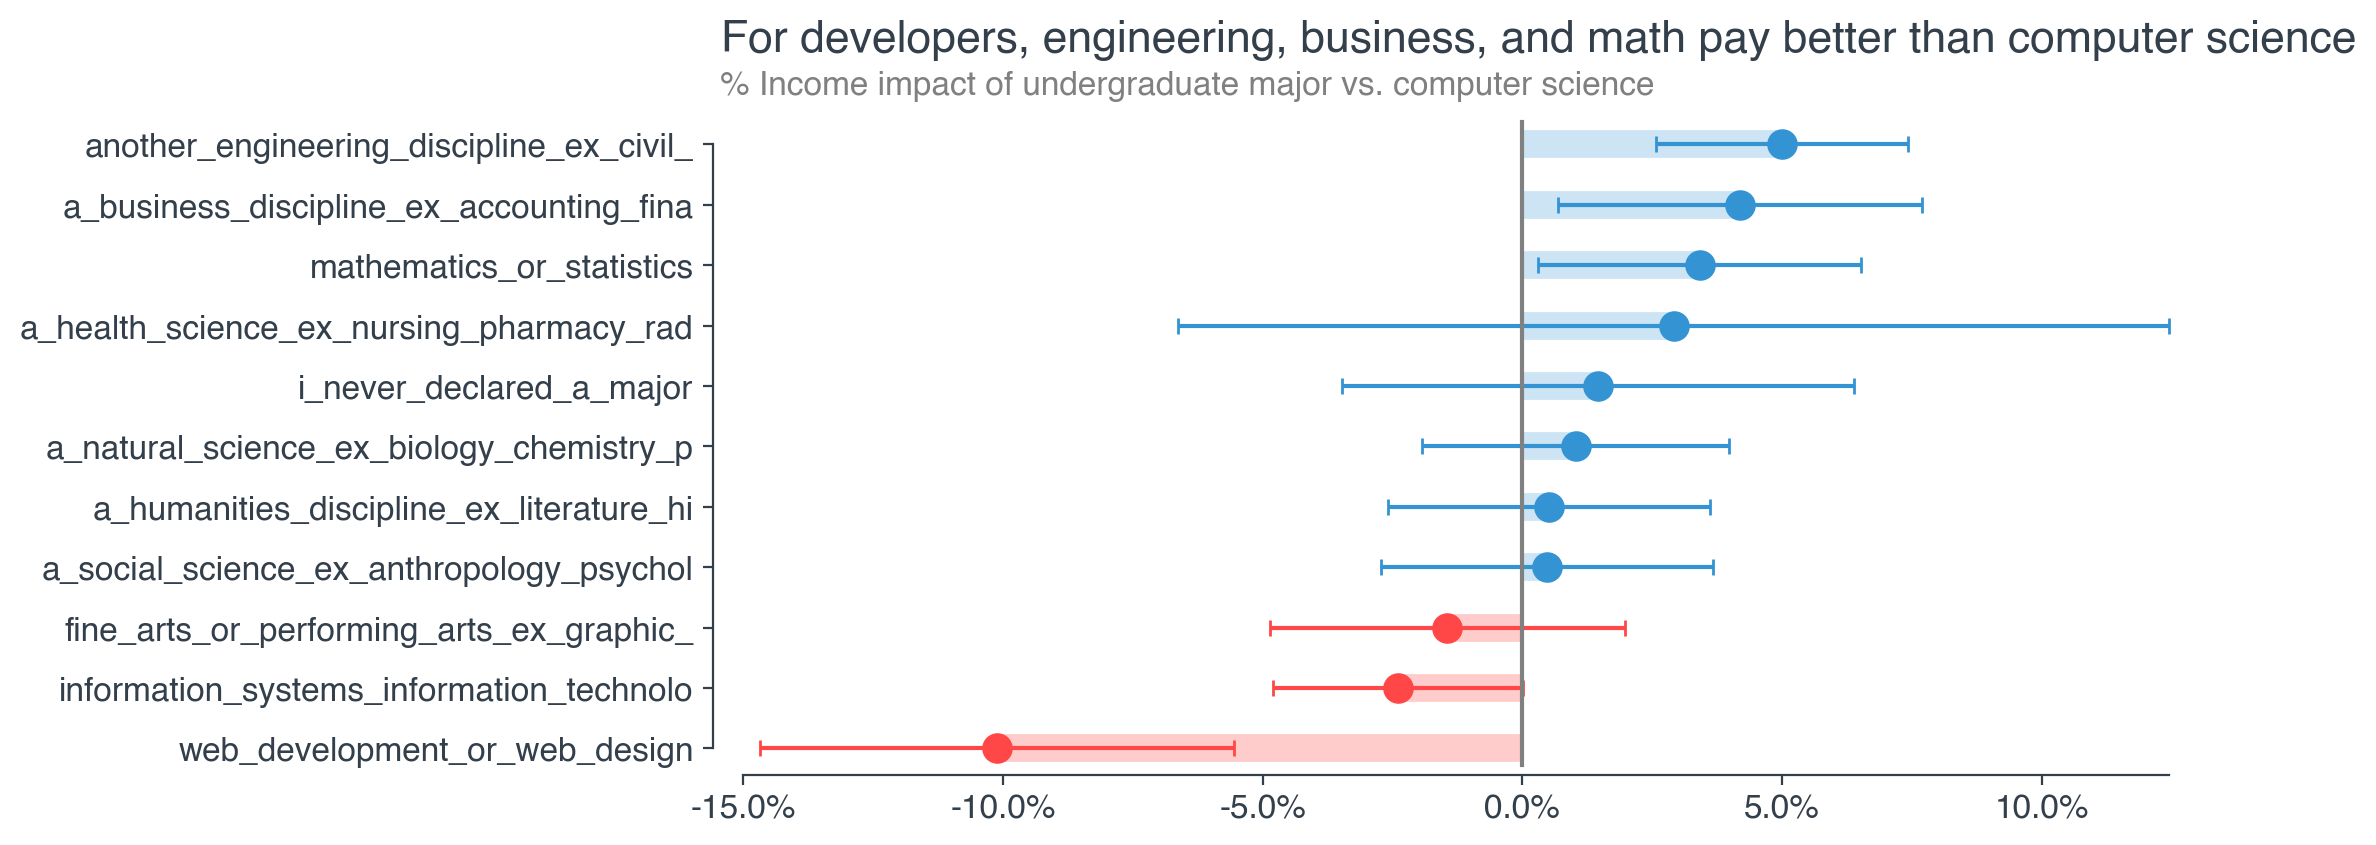

In [3]:
category = "UndergradMajor"
category_clean = "Undergraduate Major"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits.remove("UndergradMajor_no_answer")
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("For developers, engineering, business, and math pay better than computer science", x = 0.02, y = 1.07, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of undergraduate major vs. computer science", x = 0.14, y = .93, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

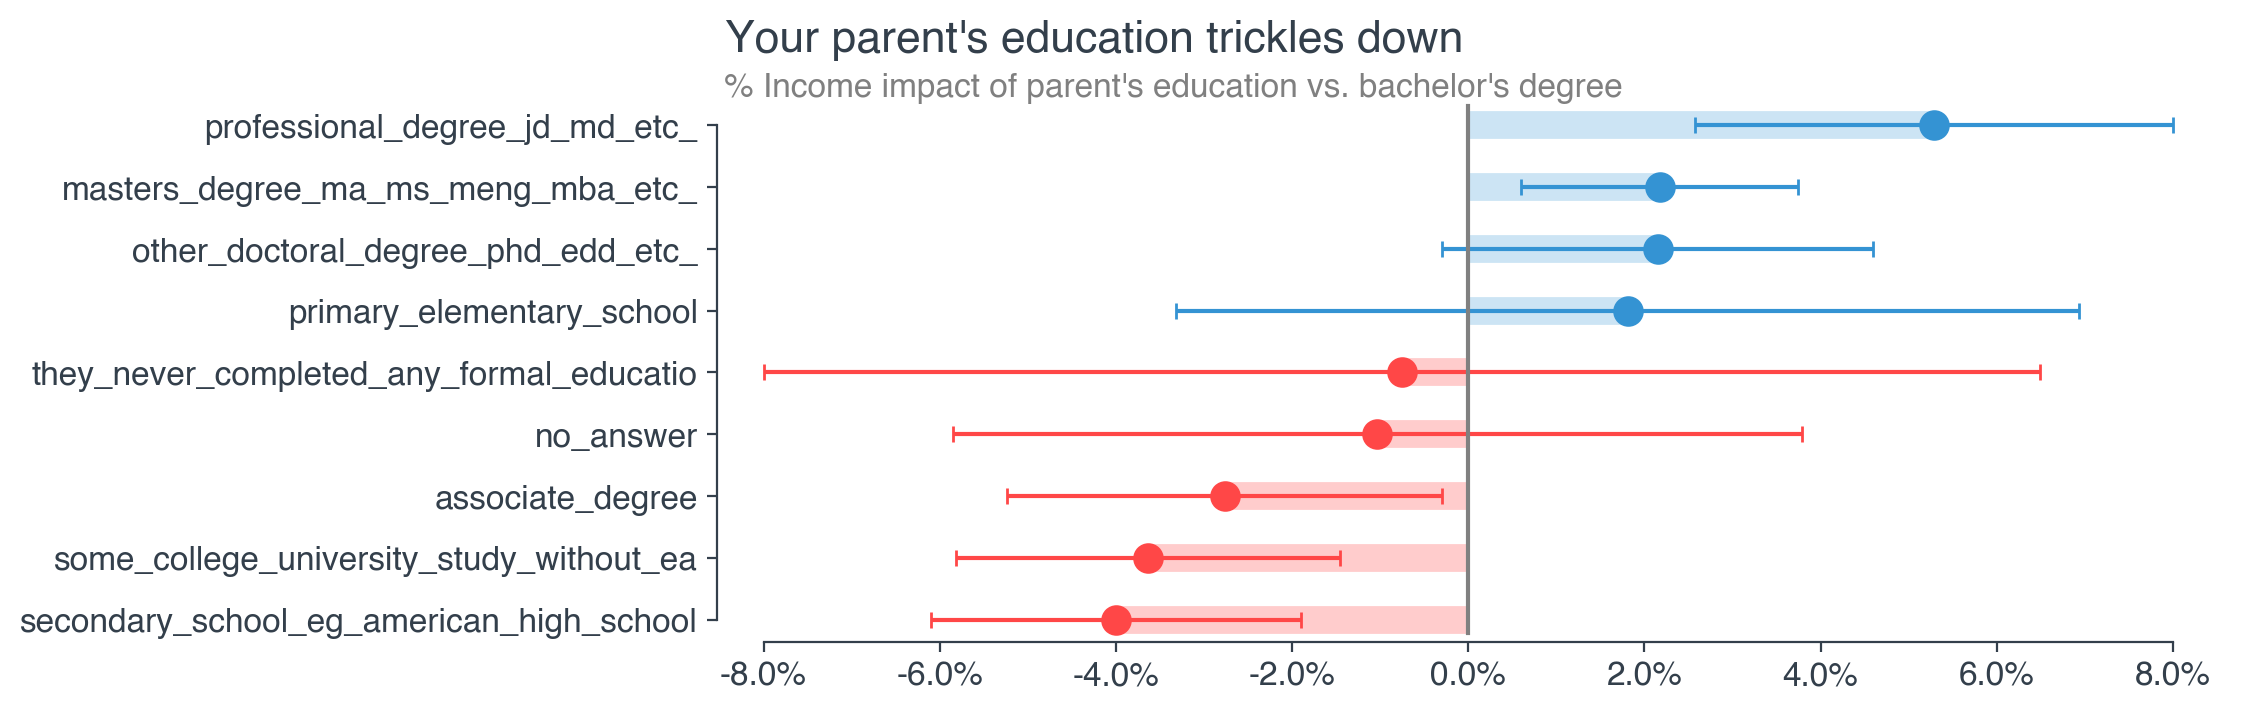

In [4]:
category = "EducationParents"
category_clean = "Highest Level of Education Reached by Parents"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
#traits.remove("EducationParents_no_answer")
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Your parent's education trickles down", x = 0.02, y = 1.06, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of parent's education vs. bachelor's degree", x = 0.14, y = .92, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

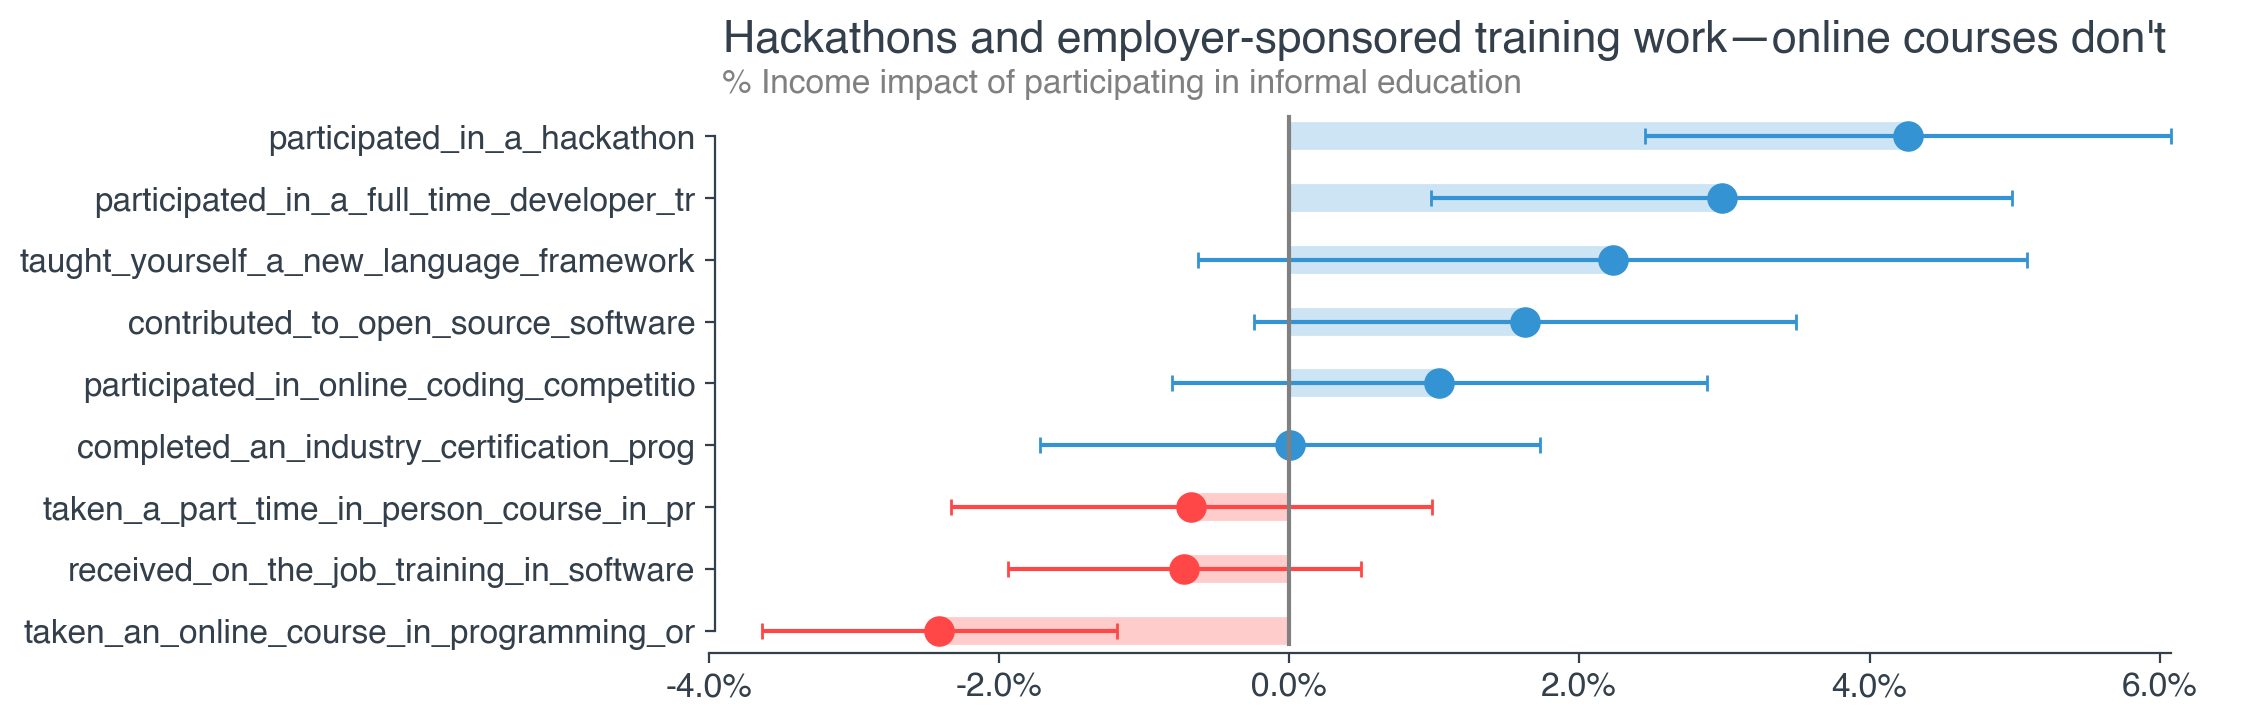

In [5]:
category = "EducationTypes"
category_clean = "Informal Education"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Hackathons and employer-sponsored training work—online courses don't", x = 0.02, y = 1.08, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of participating in informal education", x = 0.14, y = .94, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

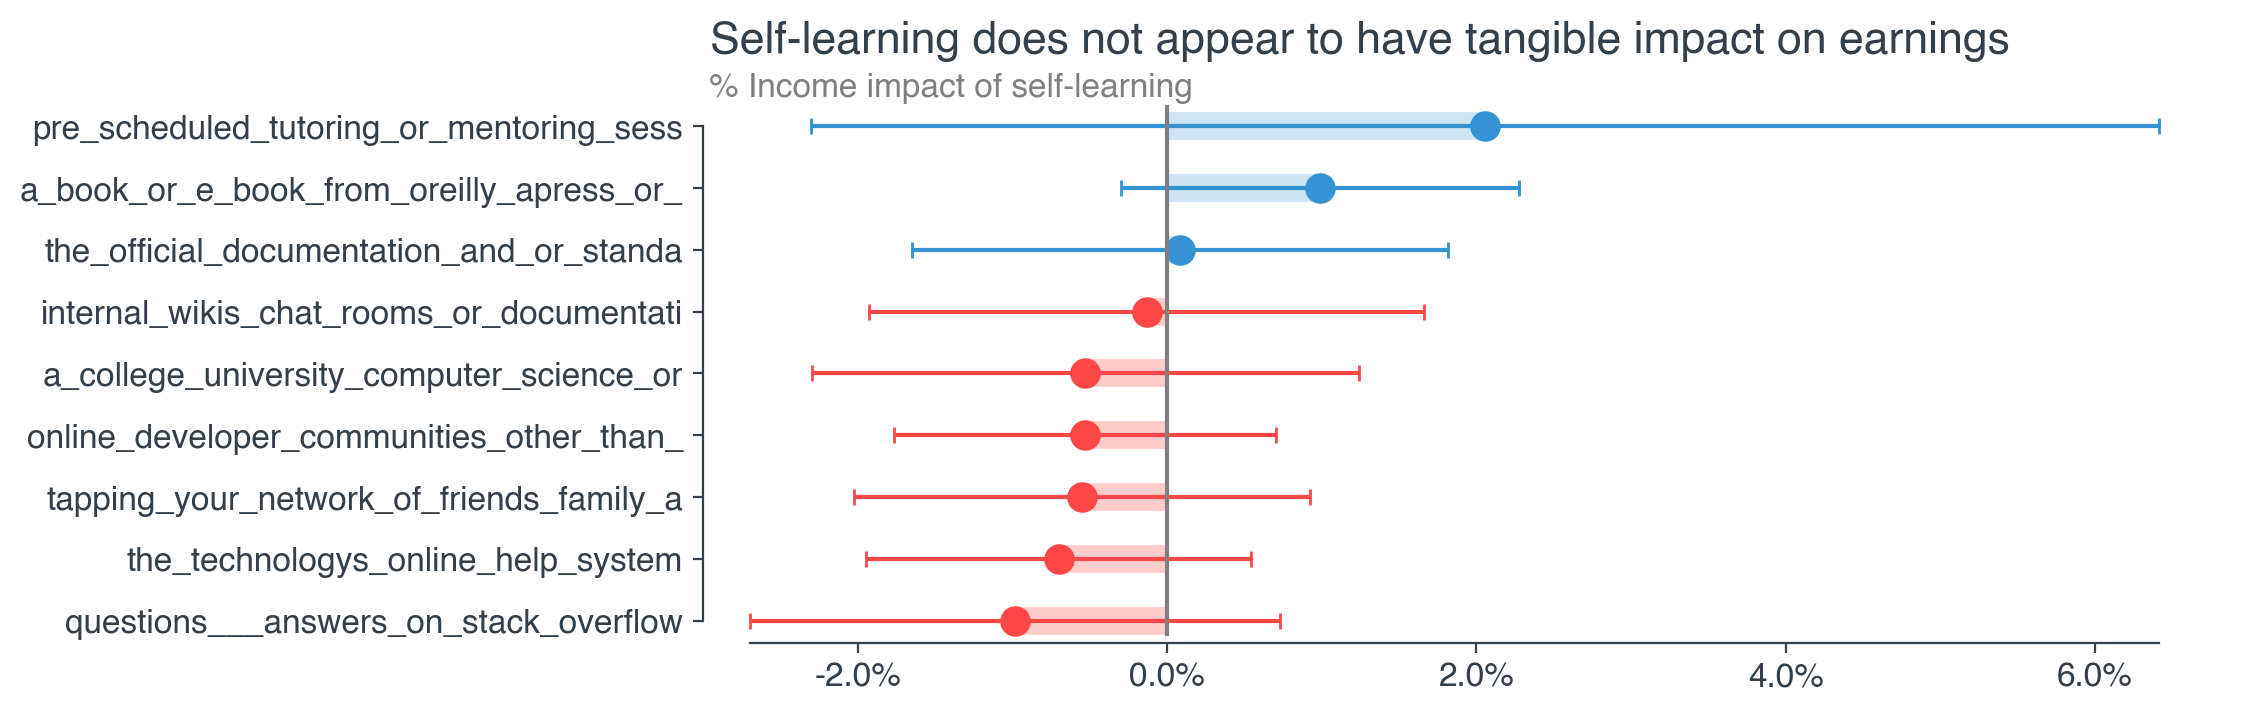

In [6]:
category = "SelfTaughtTypes"
category_clean = "Self-Teaching"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Self-learning does not appear to have tangible impact on earnings", x = 0.02, y = 1.06, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of self-learning", x = 0.14, y = .92, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

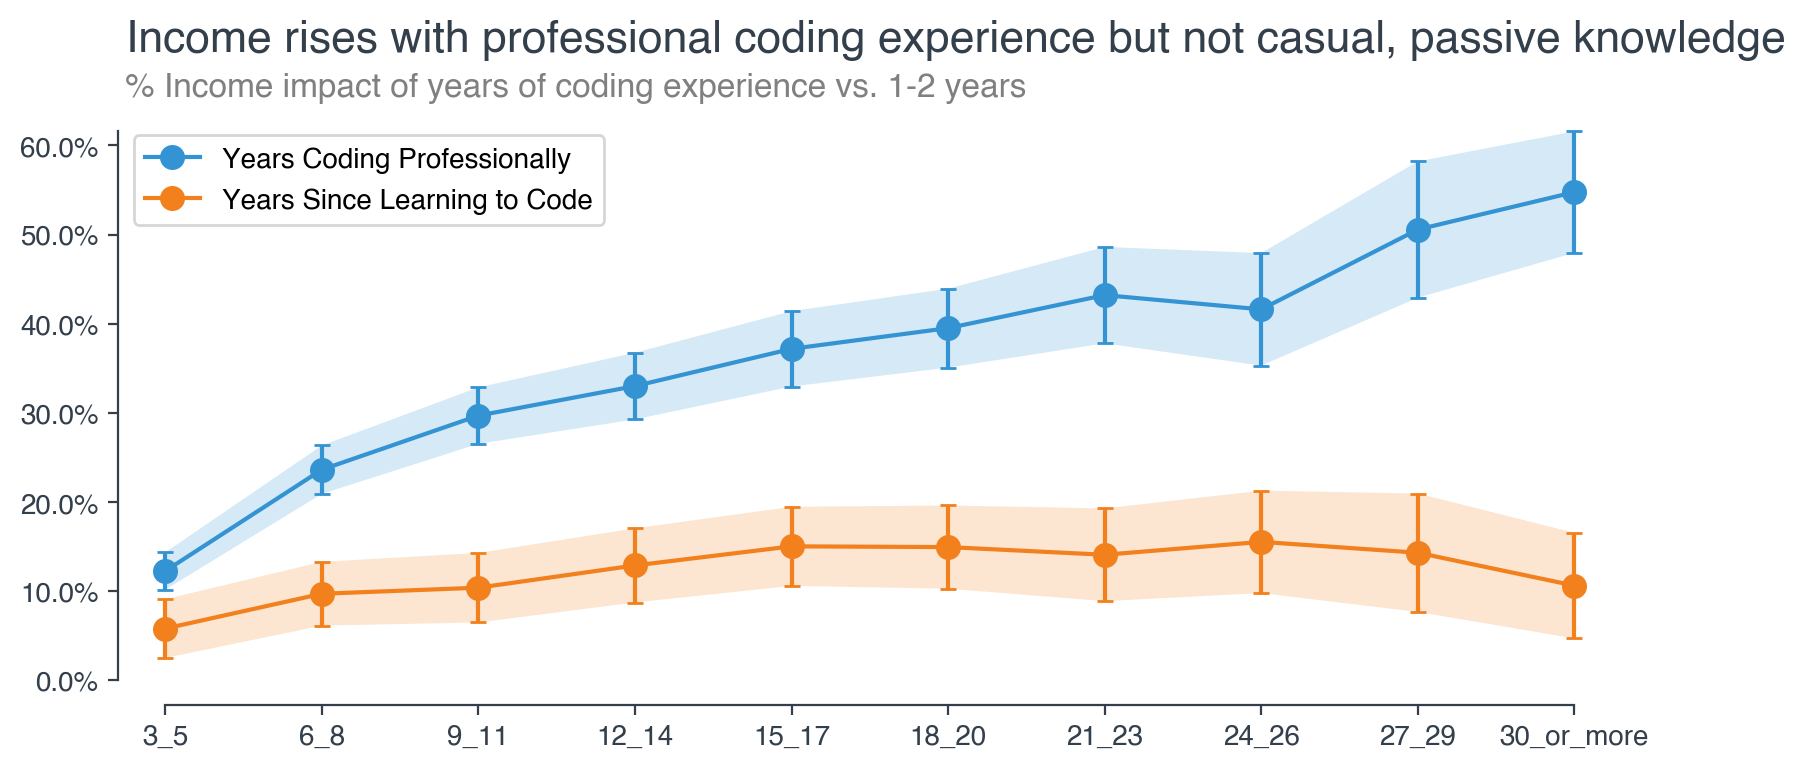

In [7]:
category = "YearsCoding_"
category_clean = "Years Since Learning to Code"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits = ["YearsCoding_3_5_years", "YearsCoding_6_8_years", "YearsCoding_9_11_years", "YearsCoding_12_14_years", "YearsCoding_15_17_years", "YearsCoding_18_20_years", "YearsCoding_21_23_years", "YearsCoding_24_26_years", "YearsCoding_27_29_years", "YearsCoding_30_or_more_years"]
traits_clean = [x[len(category):-6] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.vlines(x=my_range, ymin=0, ymax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='None', alpha=0.2, linewidth=10)
yearscoding, = plt.plot(my_range, results_df.reindex(traits)["coef"], "o-", markersize=8, color='#f2801d', alpha=1, label = "Years Since Learning to Code")
plt.errorbar(y = results_df.reindex(traits)["coef"], x = my_range, yerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#f2801d', alpha = 1)
ax.set_ylabel('')
ax.fill_between(my_range, results_df.reindex(traits)["coef"] - results_df['std_error'][traits]*1.96, results_df.reindex(traits)["coef"] + results_df['std_error'][traits]*1.96, facecolor="#f2801d", alpha = 0.2)

category = "YearsCodingProf_"
category_clean = "Years as a Coder"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits = ["YearsCodingProf_3_5_years", "YearsCodingProf_6_8_years", "YearsCodingProf_9_11_years", "YearsCodingProf_12_14_years", "YearsCodingProf_15_17_years", "YearsCodingProf_18_20_years", "YearsCodingProf_21_23_years", "YearsCodingProf_24_26_years", "YearsCodingProf_27_29_years", "YearsCodingProf_30_or_more_years"]
traits_clean = [x[len(category):-6] for x in traits]
my_range=list(range(1,len(traits)+1))

yearscodingprof, = plt.plot(my_range, results_df.reindex(traits)["coef"], "o-", markersize=8, color='#3493d3', alpha=1, label = "Years Coding Professionally")
plt.errorbar(y = results_df.reindex(traits)["coef"], x = my_range, yerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
ax.fill_between(my_range, results_df.reindex(traits)["coef"] - results_df['std_error'][traits]*1.96, results_df.reindex(traits)["coef"] + results_df['std_error'][traits]*1.96, facecolor="#3493d3", alpha = 0.2)
ax.set_yticklabels(['{:,.1%}'.format(y) for y in ax.get_yticks()])
plt.xticks(my_range, traits_clean)

ax.legend((yearscodingprof, yearscoding), ("Years Coding Professionally", "Years Since Learning to Code"), loc = (.025,.8))
plt.title("Income rises with professional coding experience but not casual, passive knowledge", x = 0.02, y = 1.06, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of years of coding experience vs. 1-2 years", x = 0.14, y = .92, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

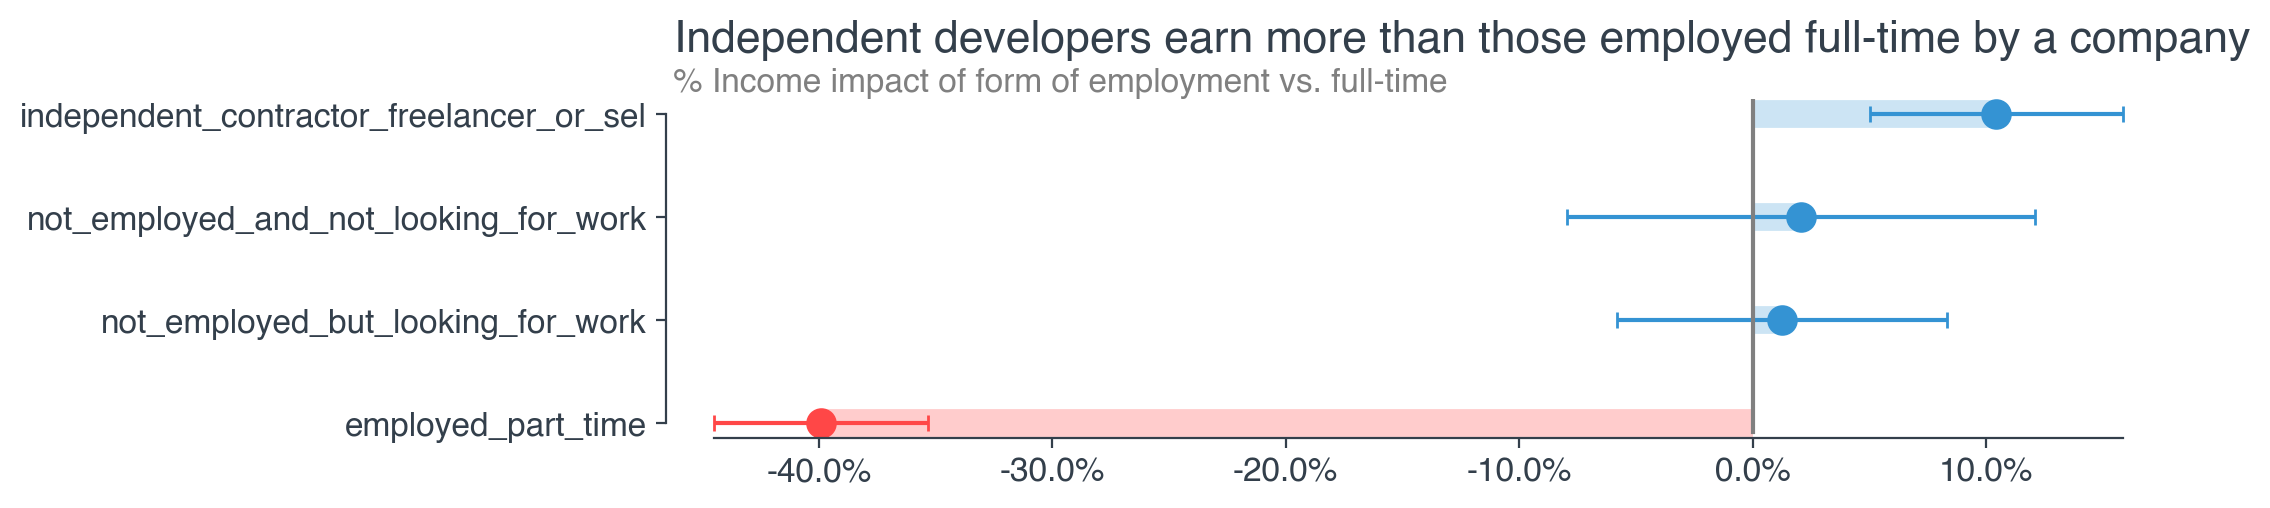

In [8]:
category = "Employment"
category_clean = "Form of Employment"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits.remove("Employment_no_answer")
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,2.25), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Independent developers earn more than those employed full-time by a company", x = 0.02, y = 1.09, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of form of employment vs. full-time", x = 0.14, y = .95, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

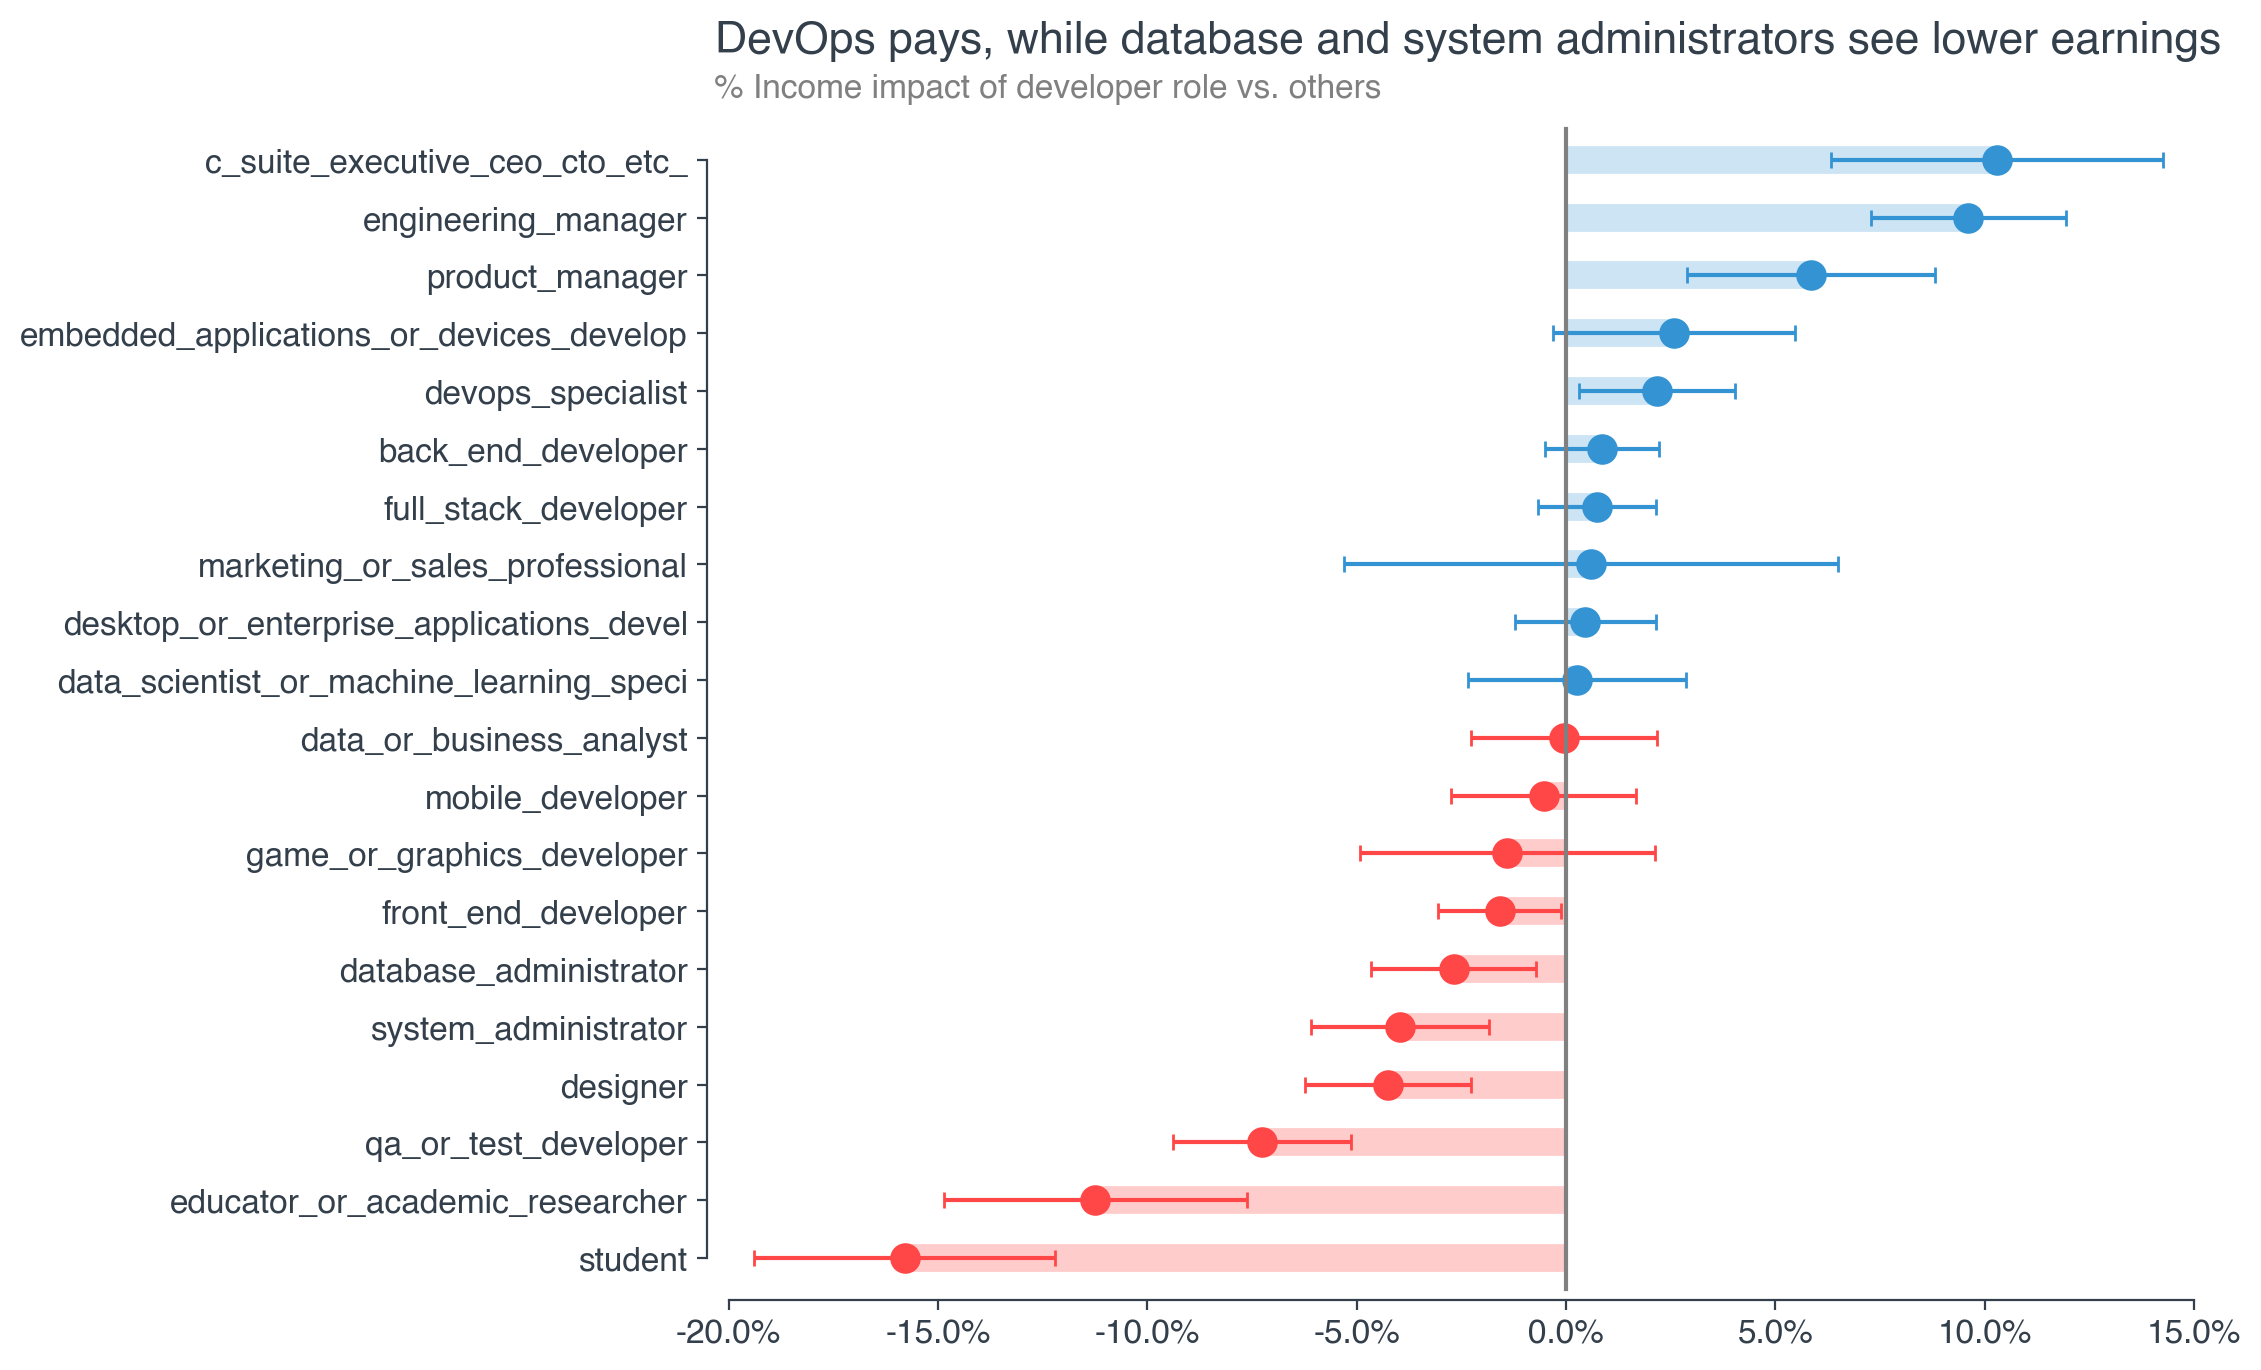

In [9]:
category = "DevType"
category_clean = "Type of Developer"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("DevOps pays, while database and system administrators see lower earnings", x = 0.02, y = 1.03, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of developer role vs. others", x = 0.14, y = .9, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

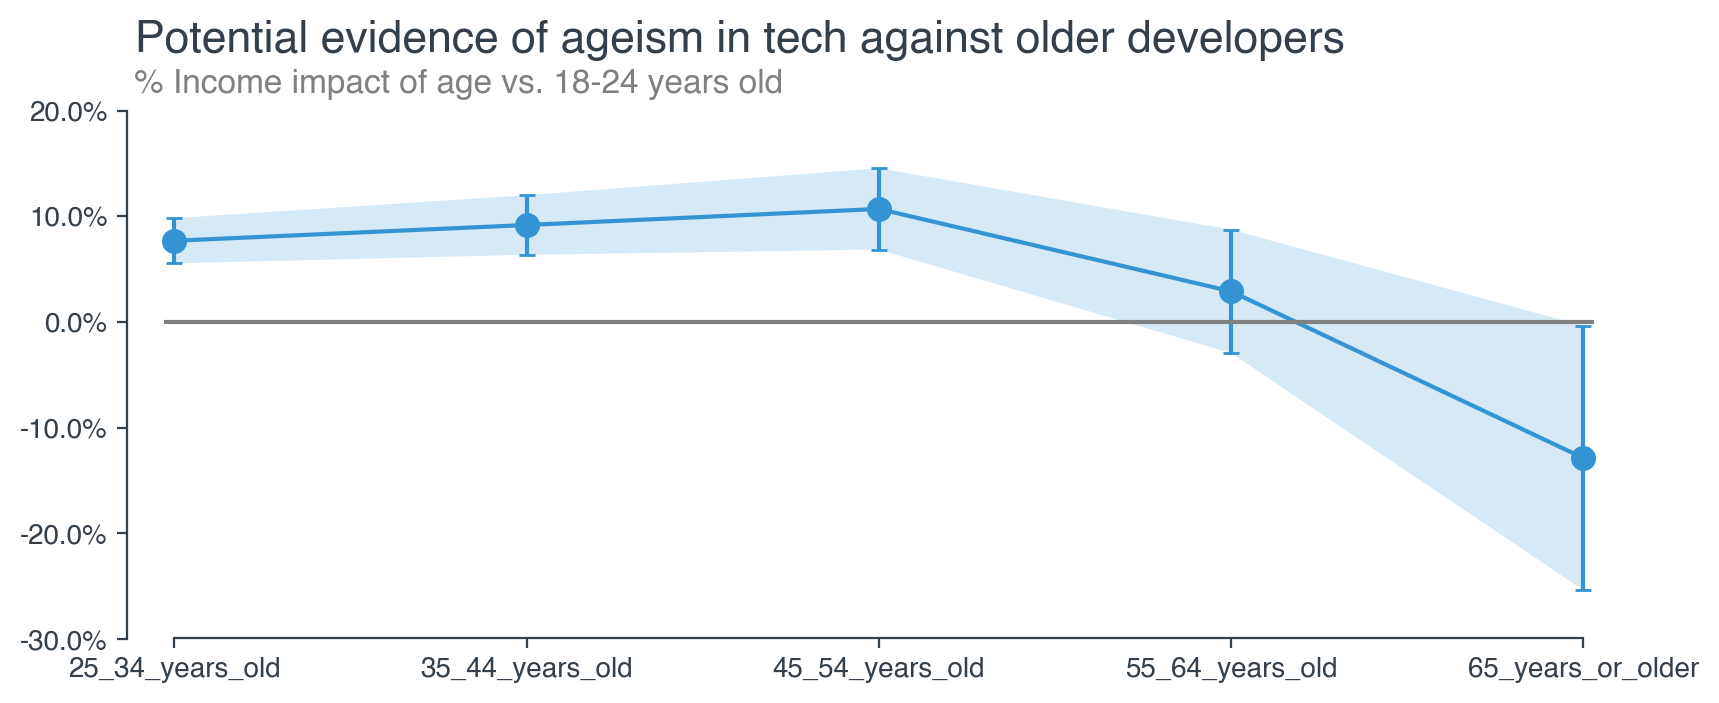

In [10]:
category = "Age"
category_clean = "Age"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits = sorted(traits)
traits.remove("Age_no_answer")
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,3.5), dpi = 200)
plt.plot(my_range, results_df.reindex(traits)["coef"], "o-", markersize=8, color='#3493d3', alpha=1)
plt.ylim(-.3,.2)
plt.errorbar(y = results_df.reindex(traits)["coef"], x = my_range, yerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
ax.set_ylabel('')
plt.axhline(y = 0, xmin = 0.04, xmax = 0.96, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_yticklabels(['{:,.1%}'.format(y) for y in ax.get_yticks()])
plt.xticks(my_range, traits_clean)
plt.title("Potential evidence of ageism in tech against older developers", x = 0.02, y = 1.08, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of age vs. 18-24 years old", x = 0.14, y = .94, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.fill_between(my_range, results_df.reindex(traits)["coef"] - results_df['std_error'][traits]*1.96, results_df.reindex(traits)["coef"] + results_df['std_error'][traits]*1.96, facecolor="#3493d3", alpha = 0.2)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(False)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

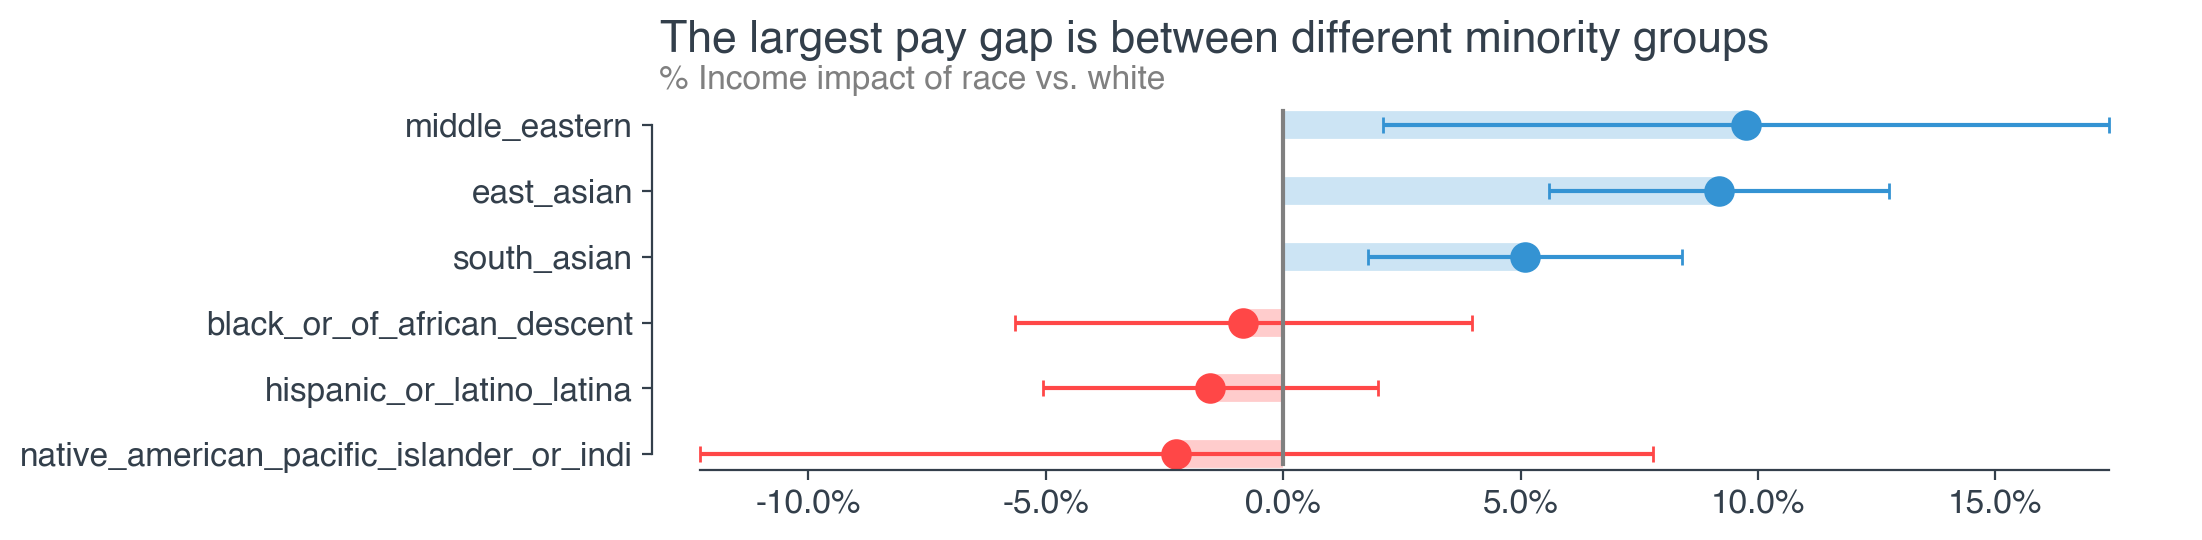

In [11]:
category = "RaceEthnicity"
category_clean = "Race / Ethnicity"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits.remove("RaceEthnicity_no_answer")
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("The largest pay gap is between different minority groups", x = 0.02, y = 1.11, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of race vs. white", x = 0.14, y = .97, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

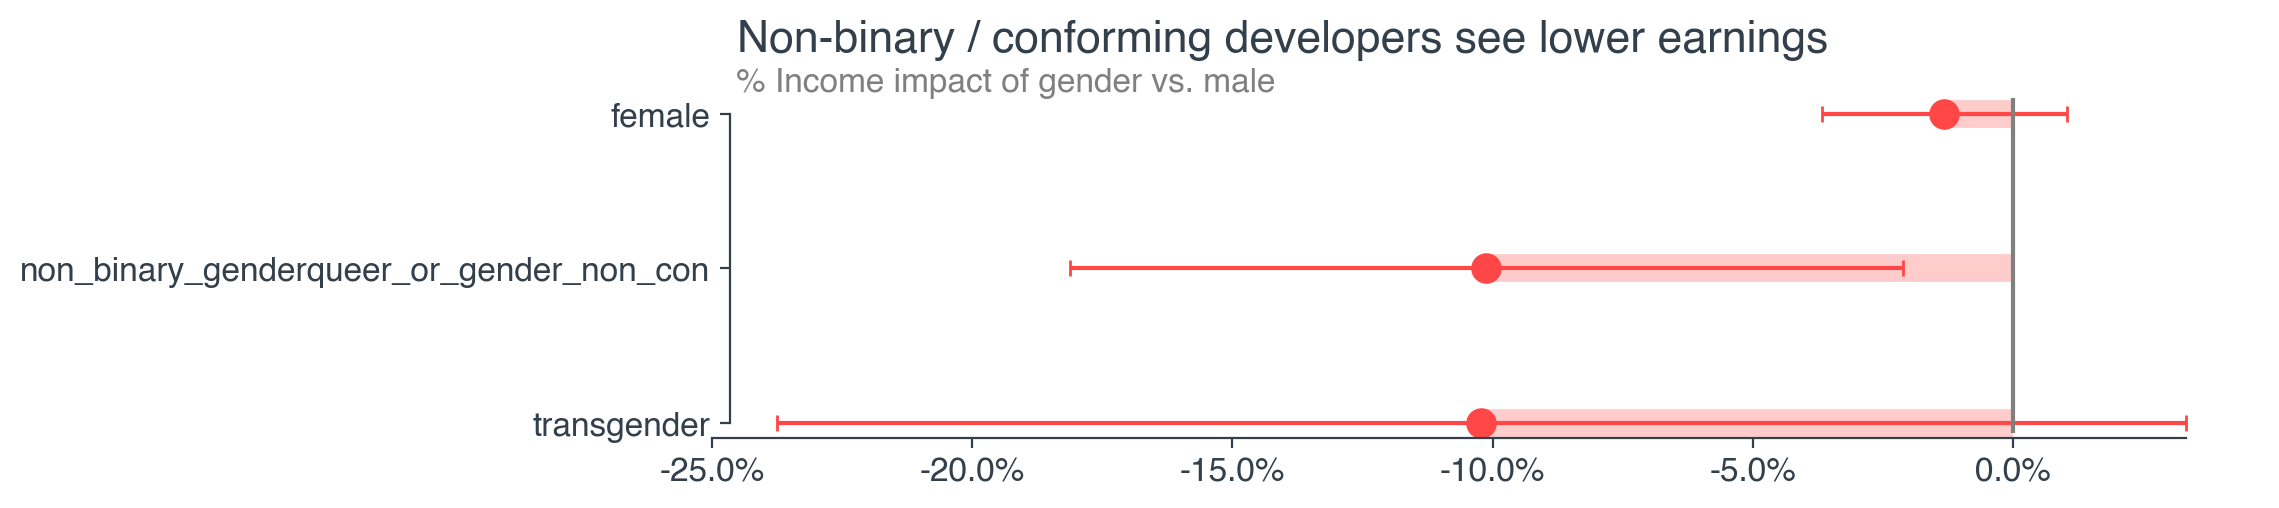

In [12]:
category = "Gender"
category_clean = "Gender"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits.remove("Gender_no_answer")
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,2.25), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Non-binary / conforming developers see lower earnings", x = 0.02, y = 1.09, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of gender vs. male", x = 0.14, y = .95, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

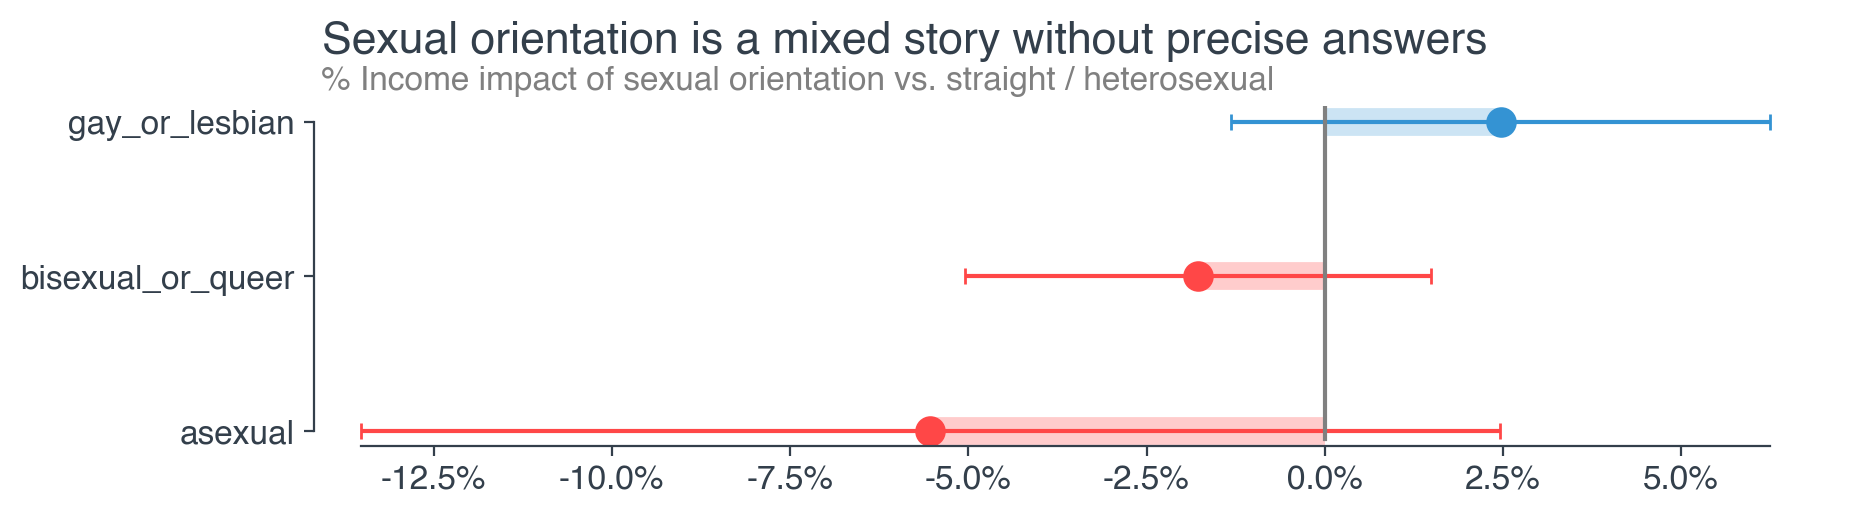

In [13]:
category = "SexualOrientation"
category_clean = "Sexual Orientation"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits.remove("SexualOrientation_no_answer")
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,2.25), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Sexual orientation is a mixed story without precise answers", x = 0.02, y = 1.11, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of sexual orientation vs. straight / heterosexual", x = 0.14, y = .97, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

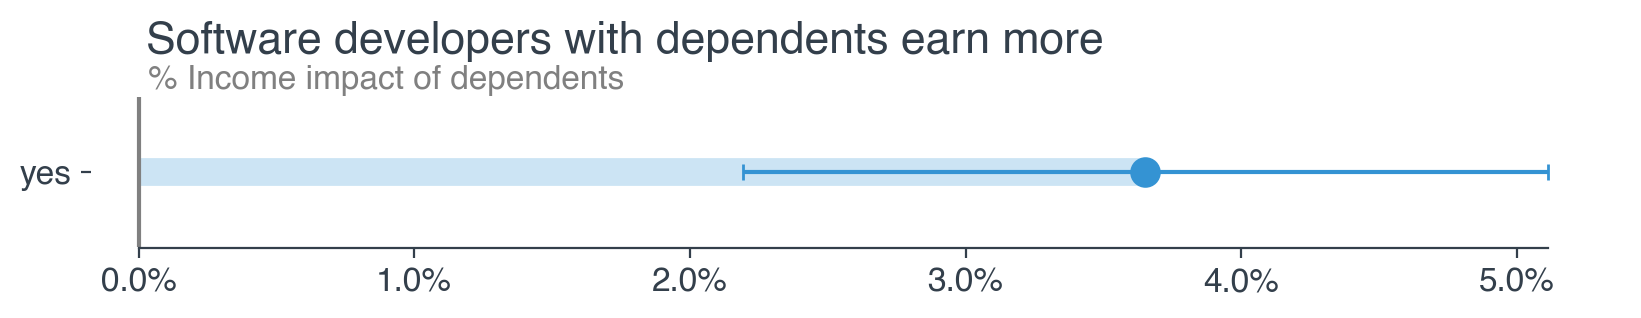

In [14]:
category = "Dependents"
category_clean = "Dependents"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits.remove("Dependents_no_answer")
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,1), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Software developers with dependents earn more", x = 0.05, y = 1.18, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of dependents", x = 0.165, y = 1.04, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

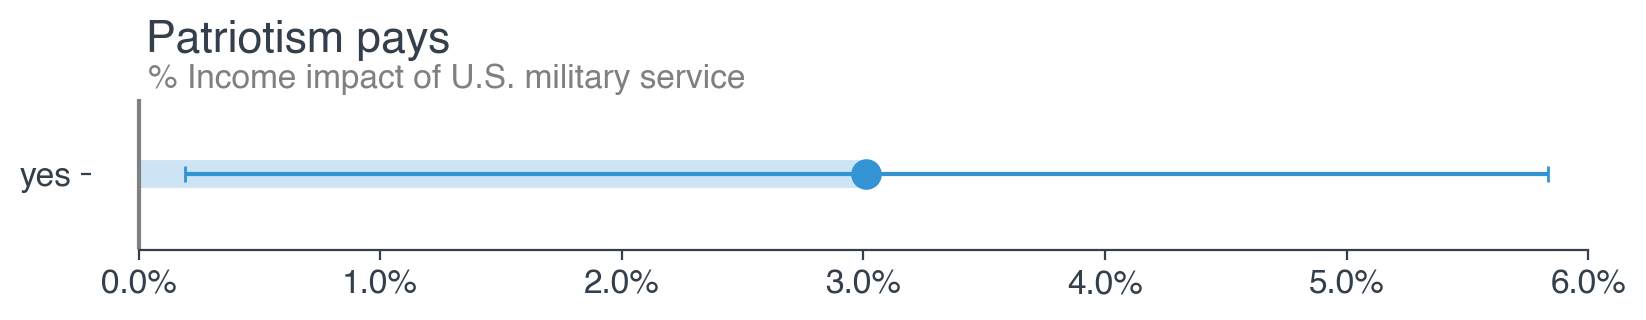

In [15]:
category = "MilitaryUS"
category_clean = "Military"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits.remove("MilitaryUS_no_answer")
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,1), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Patriotism pays", x = 0.05, y = 1.2, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of U.S. military service", x = 0.165, y = 1.06, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

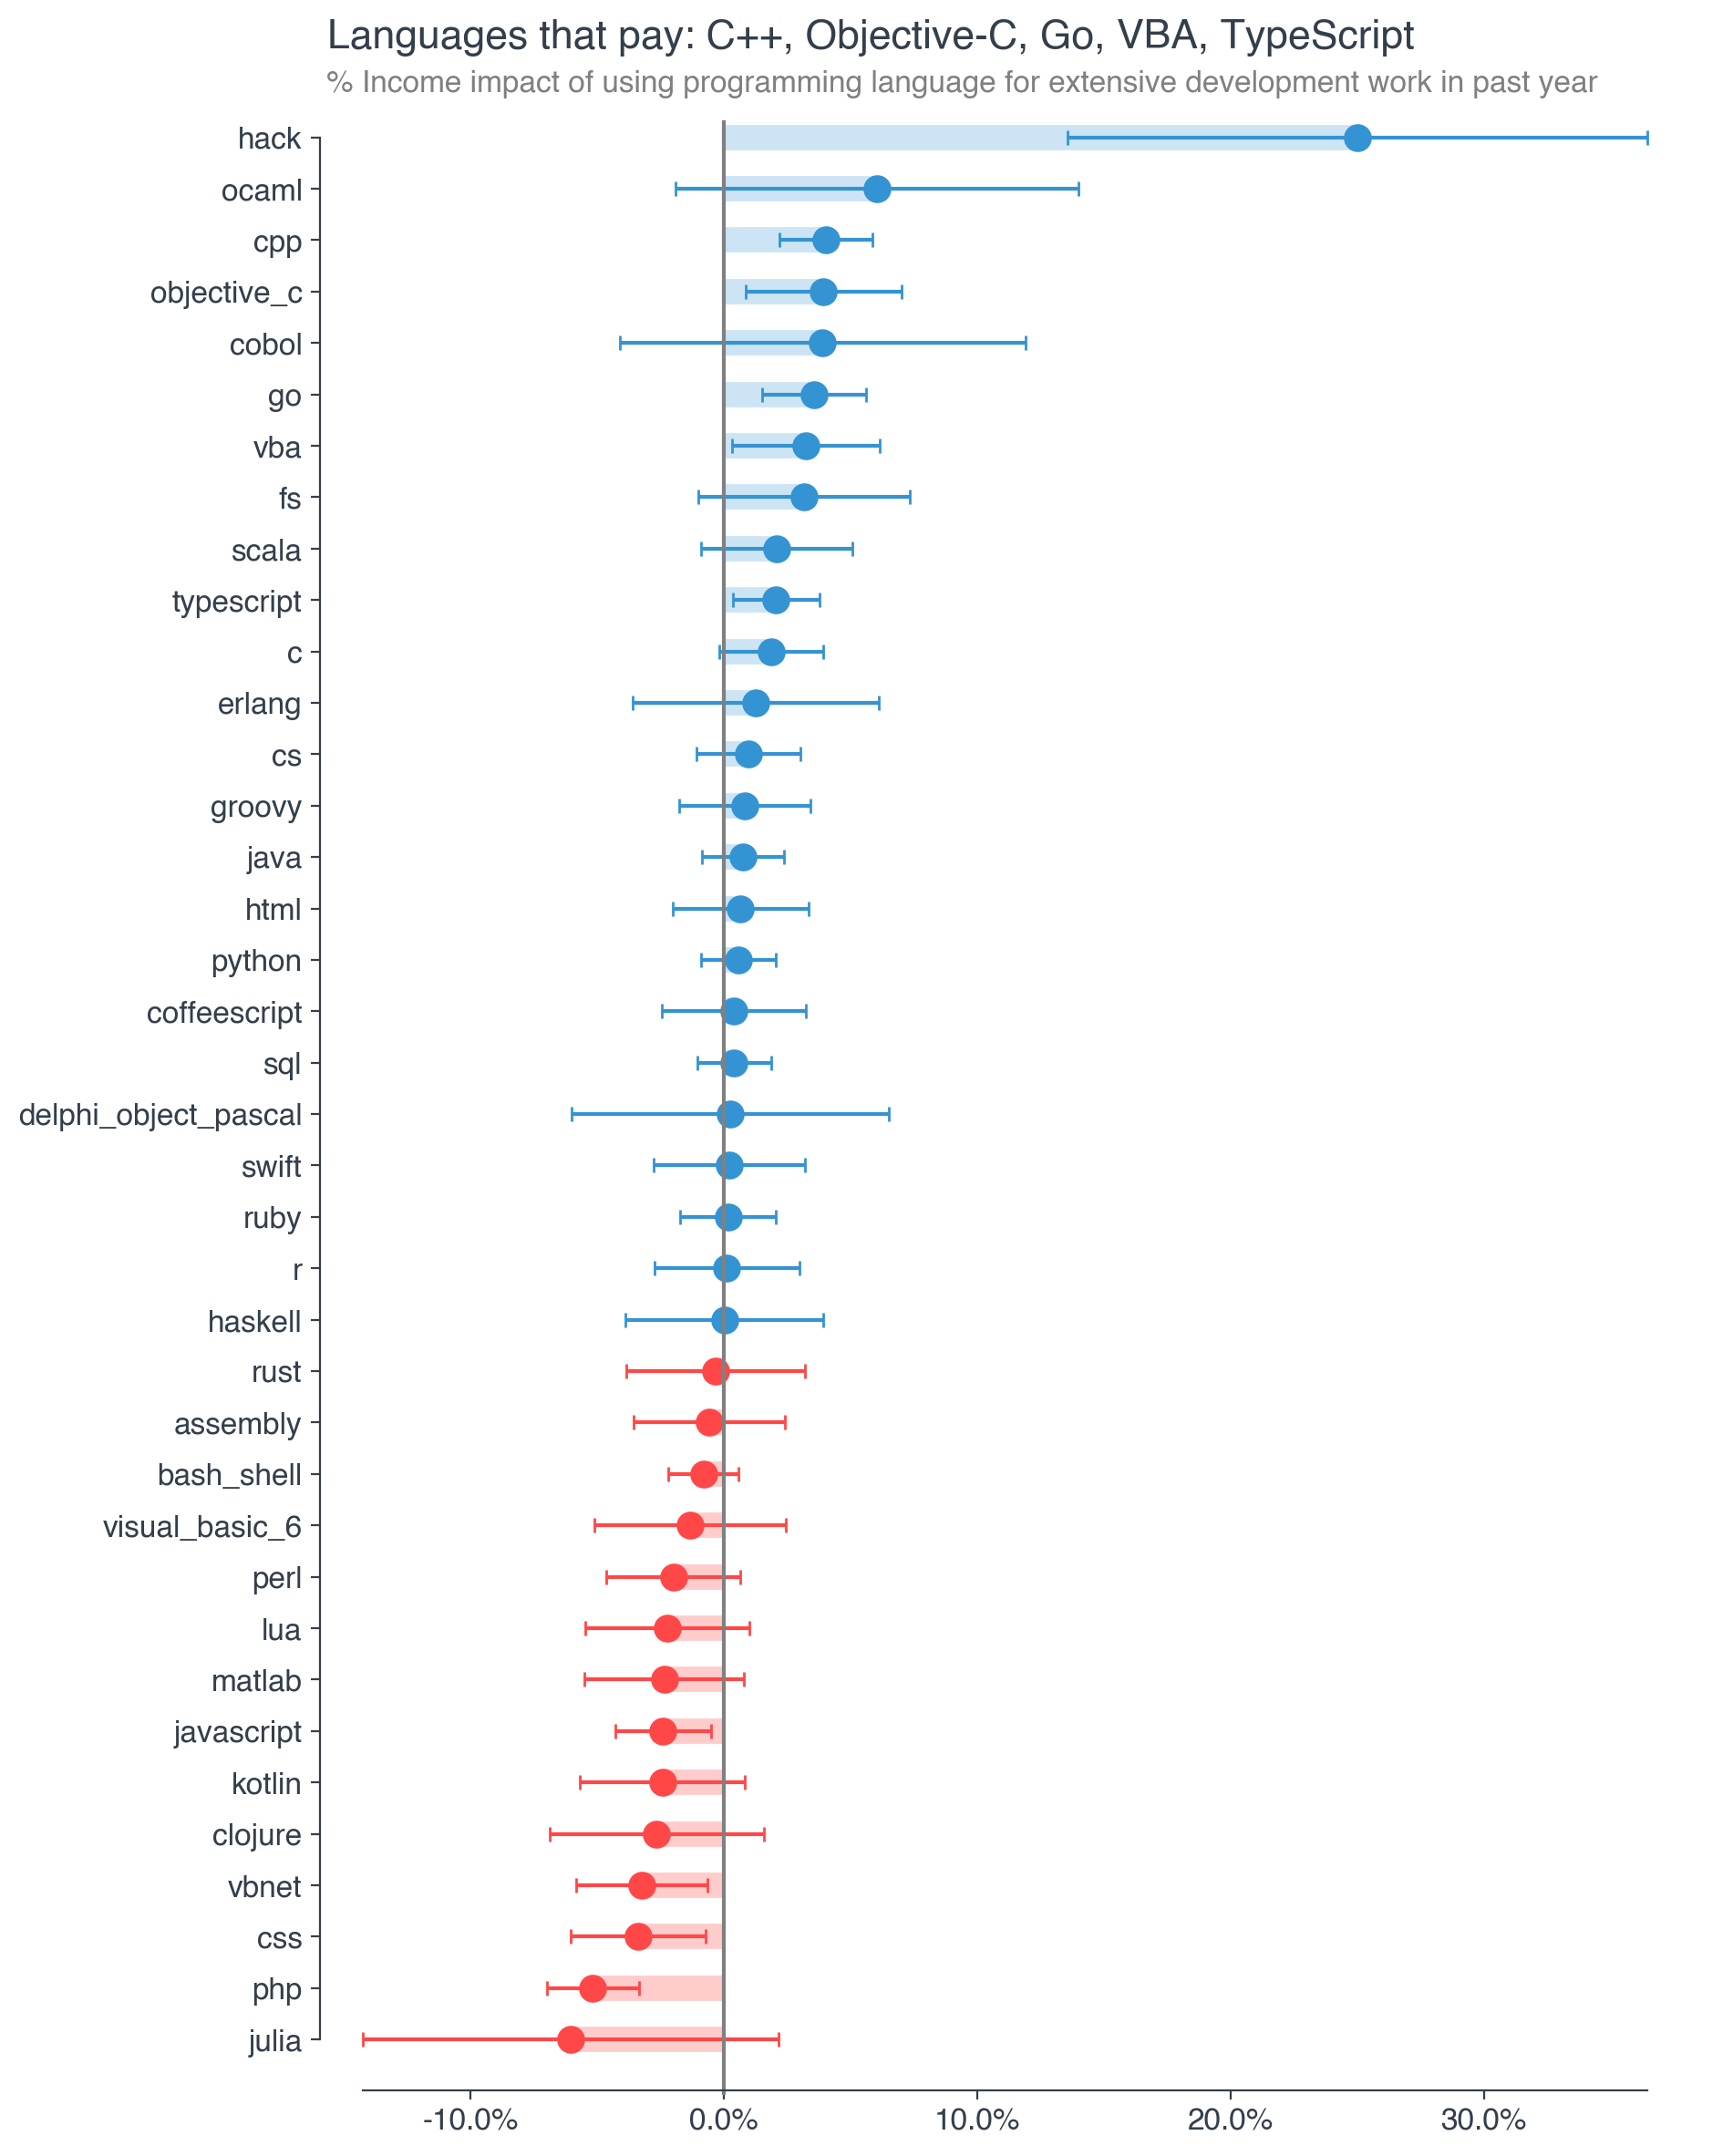

In [16]:
category = "LanguageWorkedWith"
category_clean = "Programming Languages Used for Extensive Development Work"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Languages that pay: C++, Objective-C, Go, VBA, TypeScript", x = 0.02, y = 0.99, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of using programming language for extensive development work in past year", x = 0.14, y = .87, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

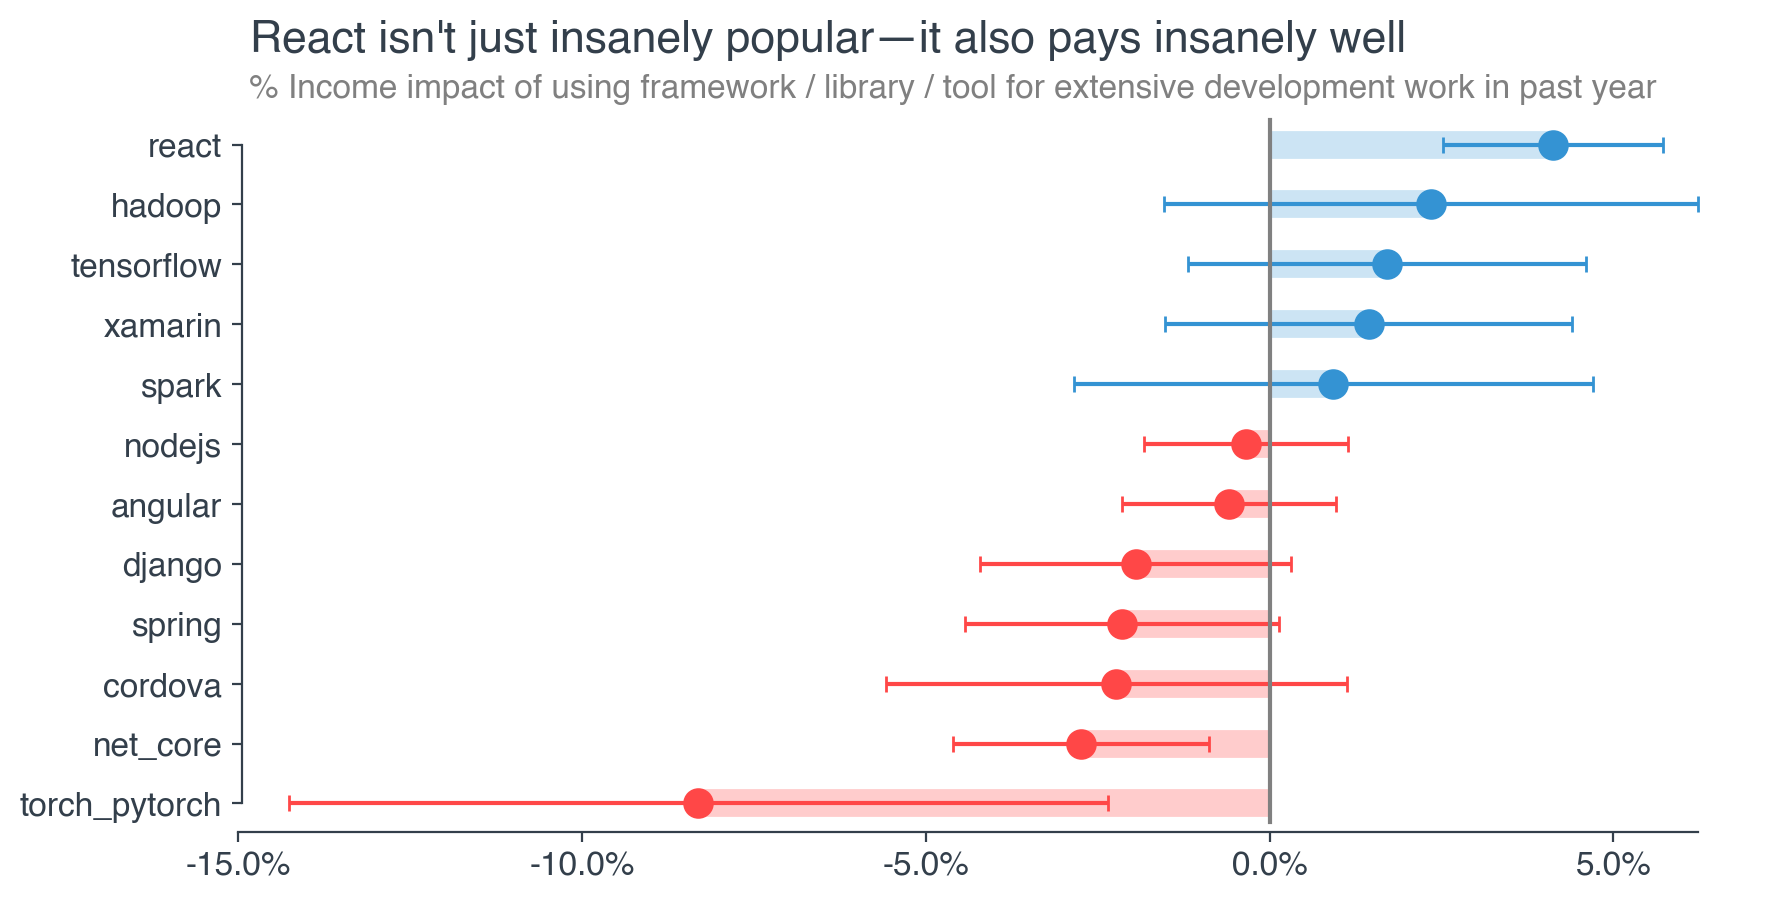

In [17]:
category = "FrameworkWorkedWith"
category_clean = "Frameworks, Libraries, and Tools Used for Extensive Development Work"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("React isn't just insanely popular—it also pays insanely well", x = 0.02, y = 1.06, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of using framework / library / tool for extensive development work in past year", x = 0.14, y = .92, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

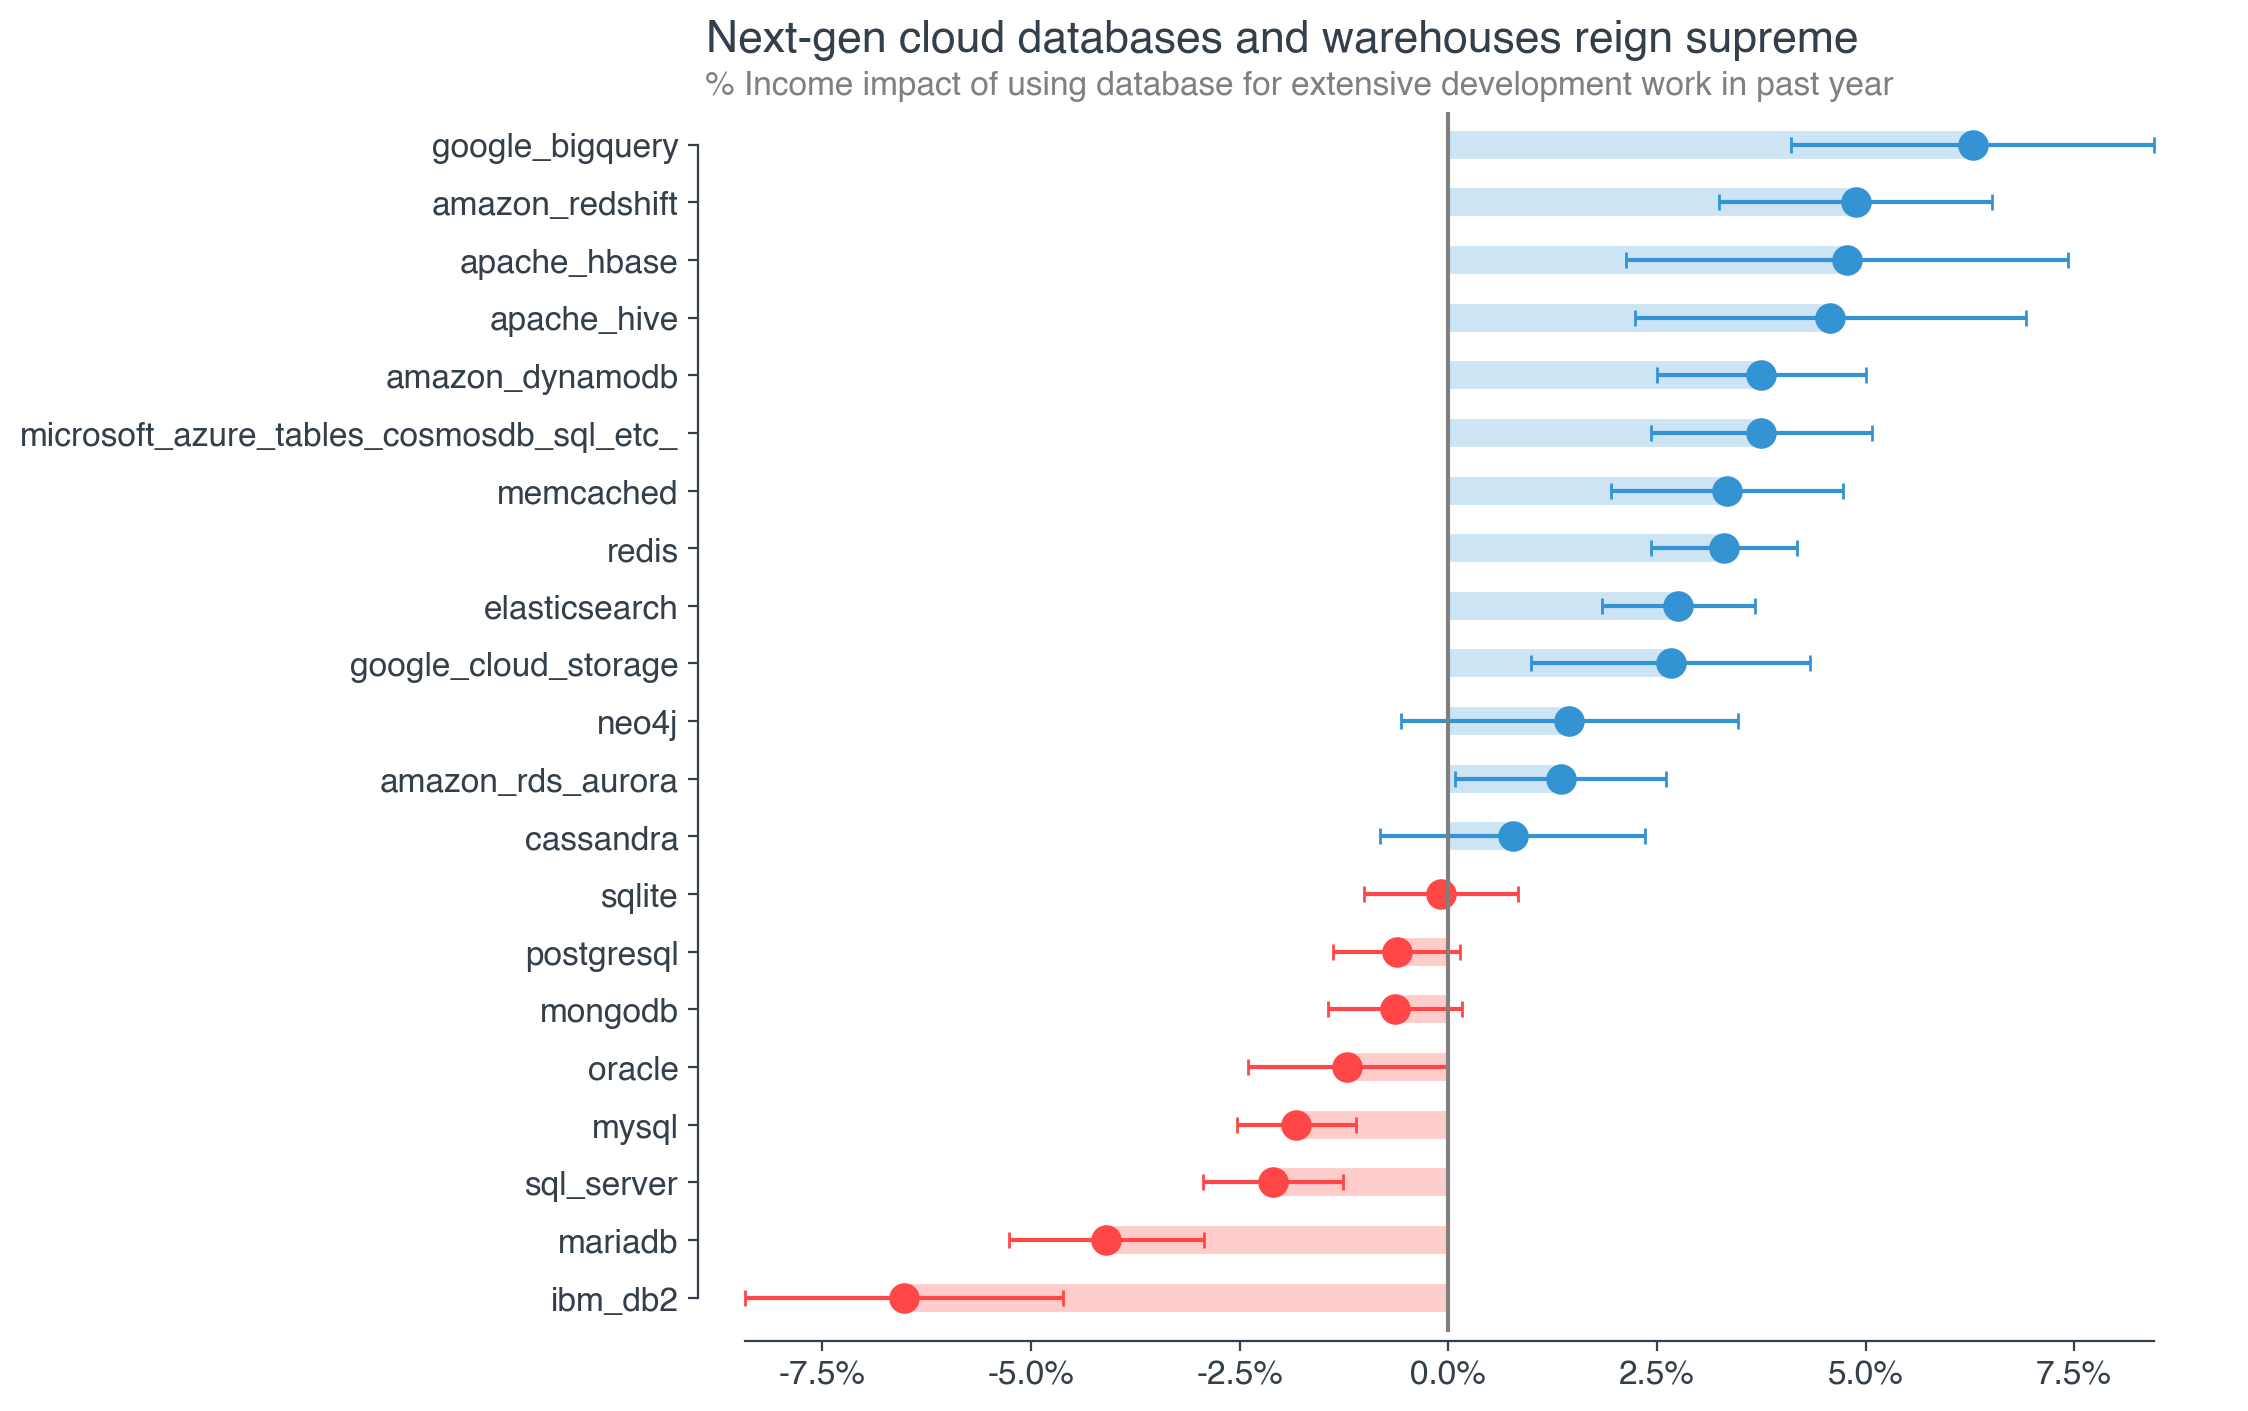

In [18]:
category = "DatabaseWorkedWith"
category_clean = "Databases Used for Extensive Development Work"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits_clean = [x[len(category)+1:] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits], fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits], fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Next-gen cloud databases and warehouses reign supreme", x = 0.02, y = 1.015, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of using database for extensive development work in past year", x = 0.14, y = .89, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

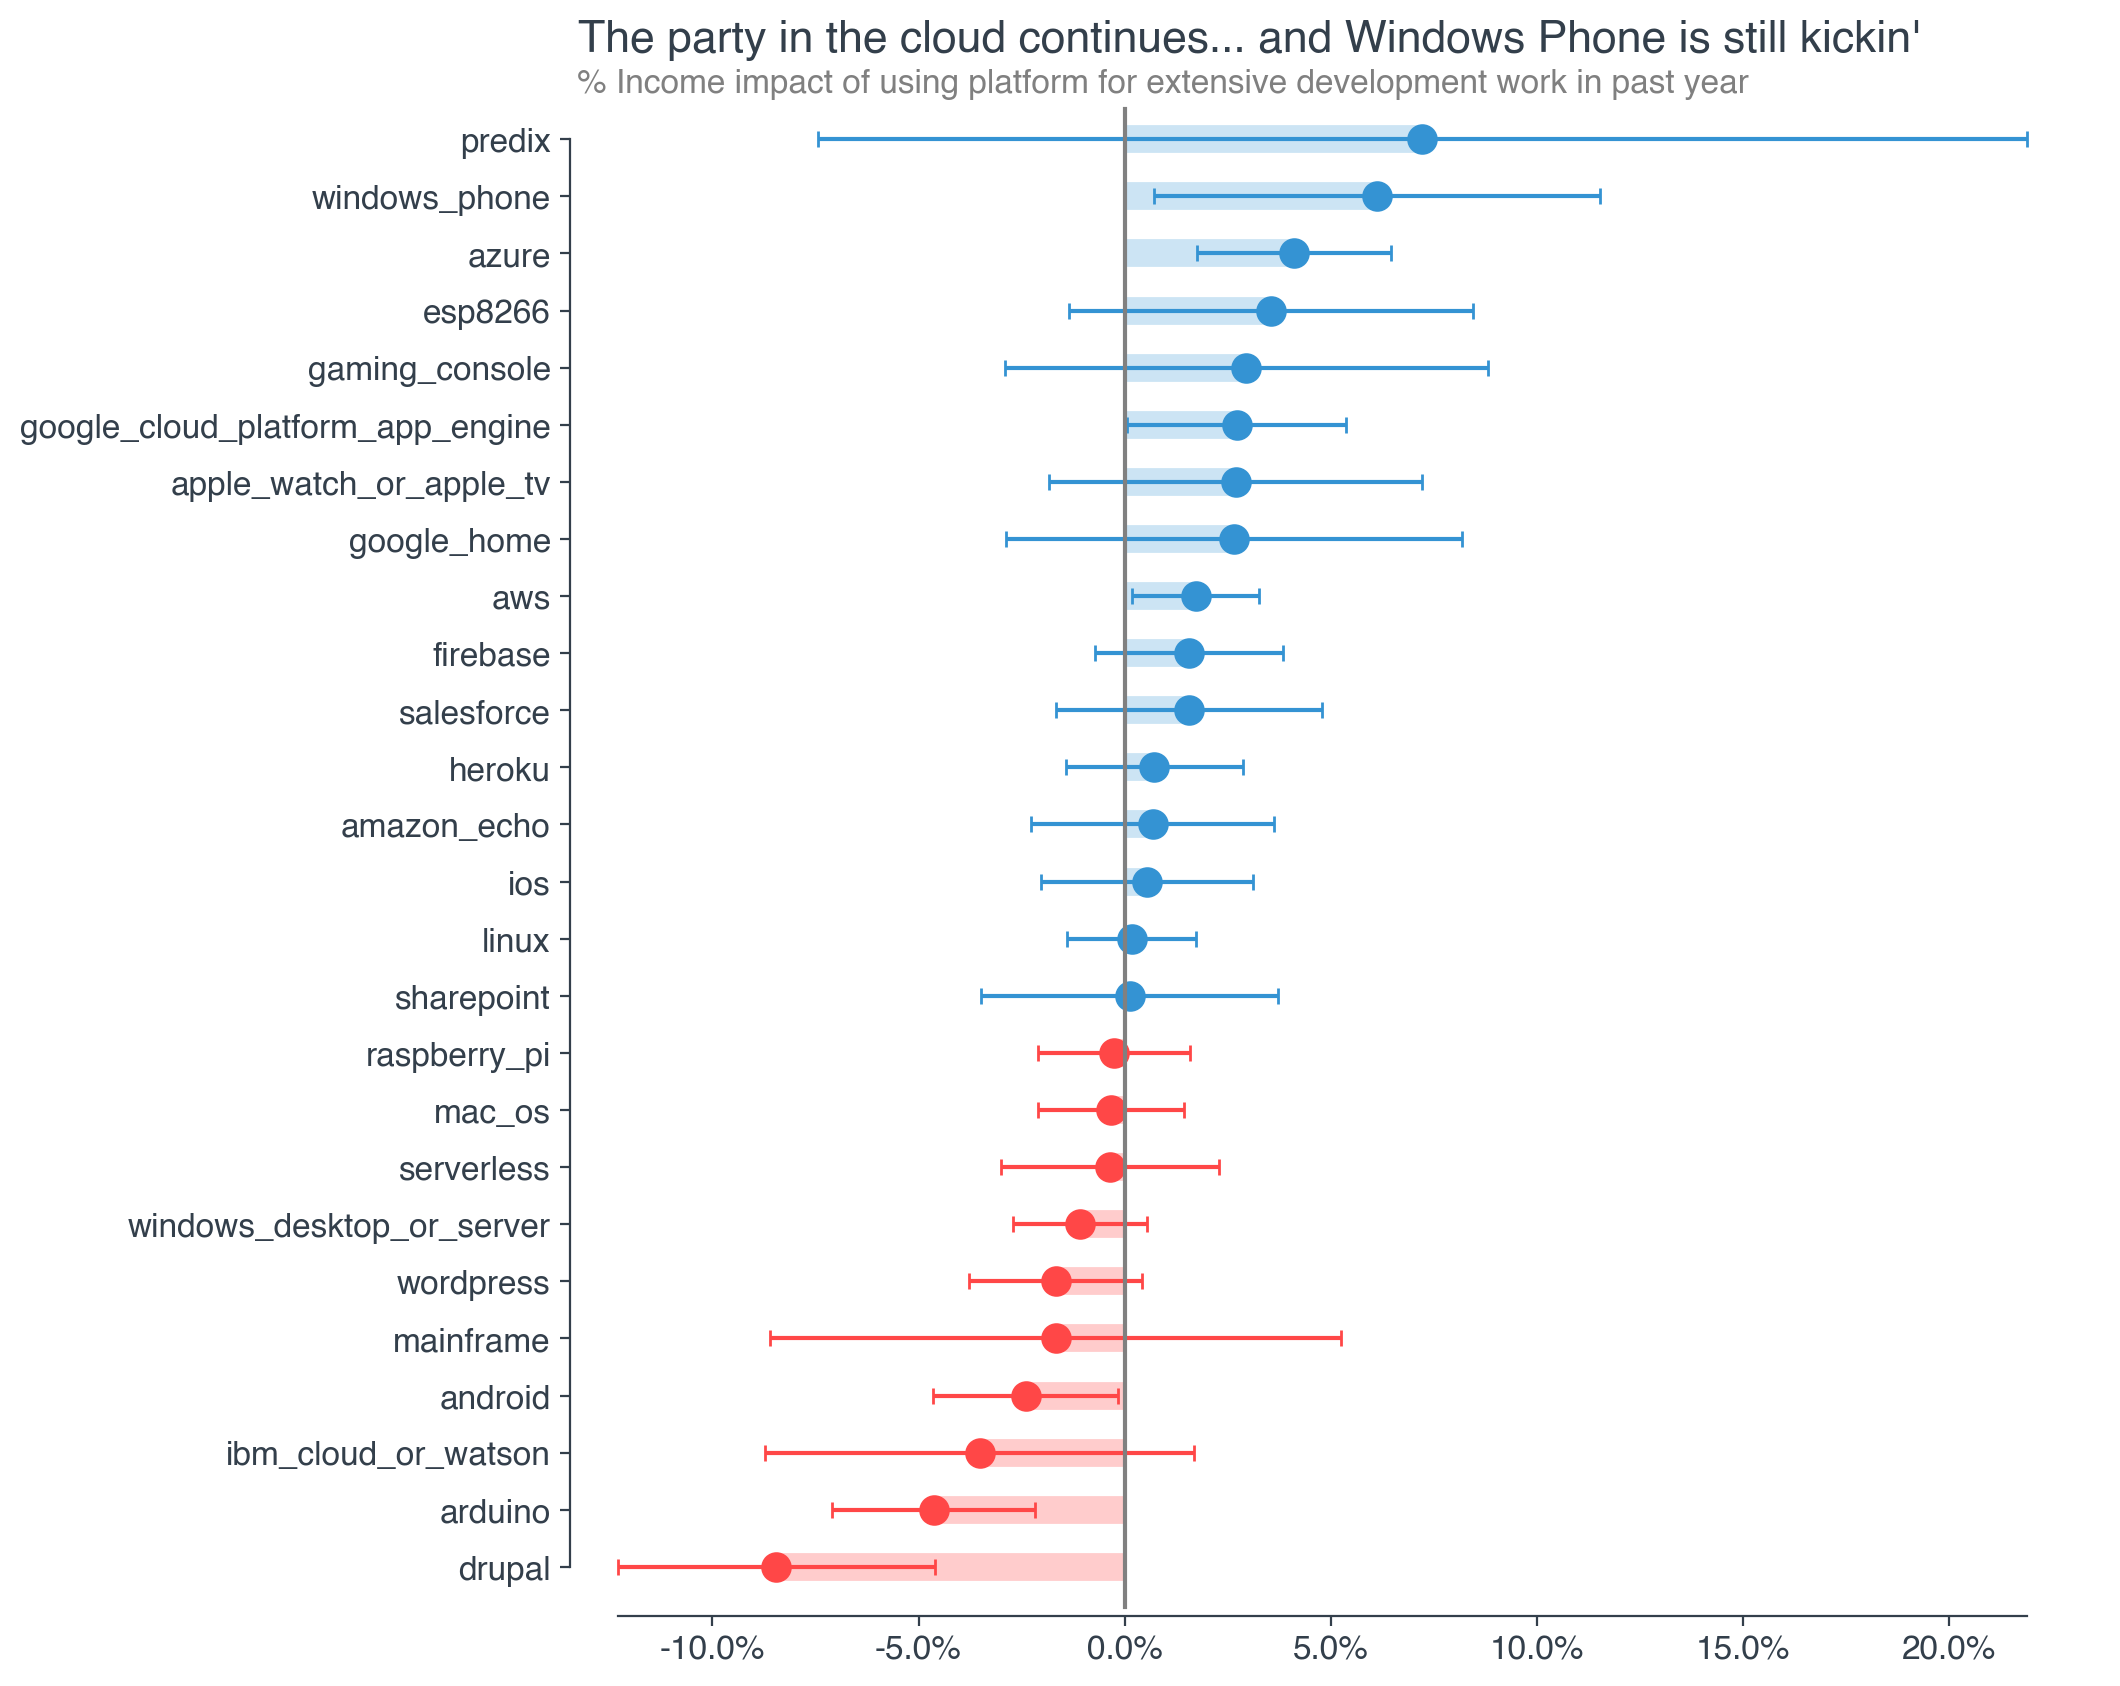

In [19]:
category = "PlatformWorkedWith"
category_clean = "Platforms Used for Extensive Development Work"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("The party in the cloud continues... and Windows Phone is still kickin'", x = 0.02, y = 1.00, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of using platform for extensive development work in past year", x = 0.14, y = .88, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

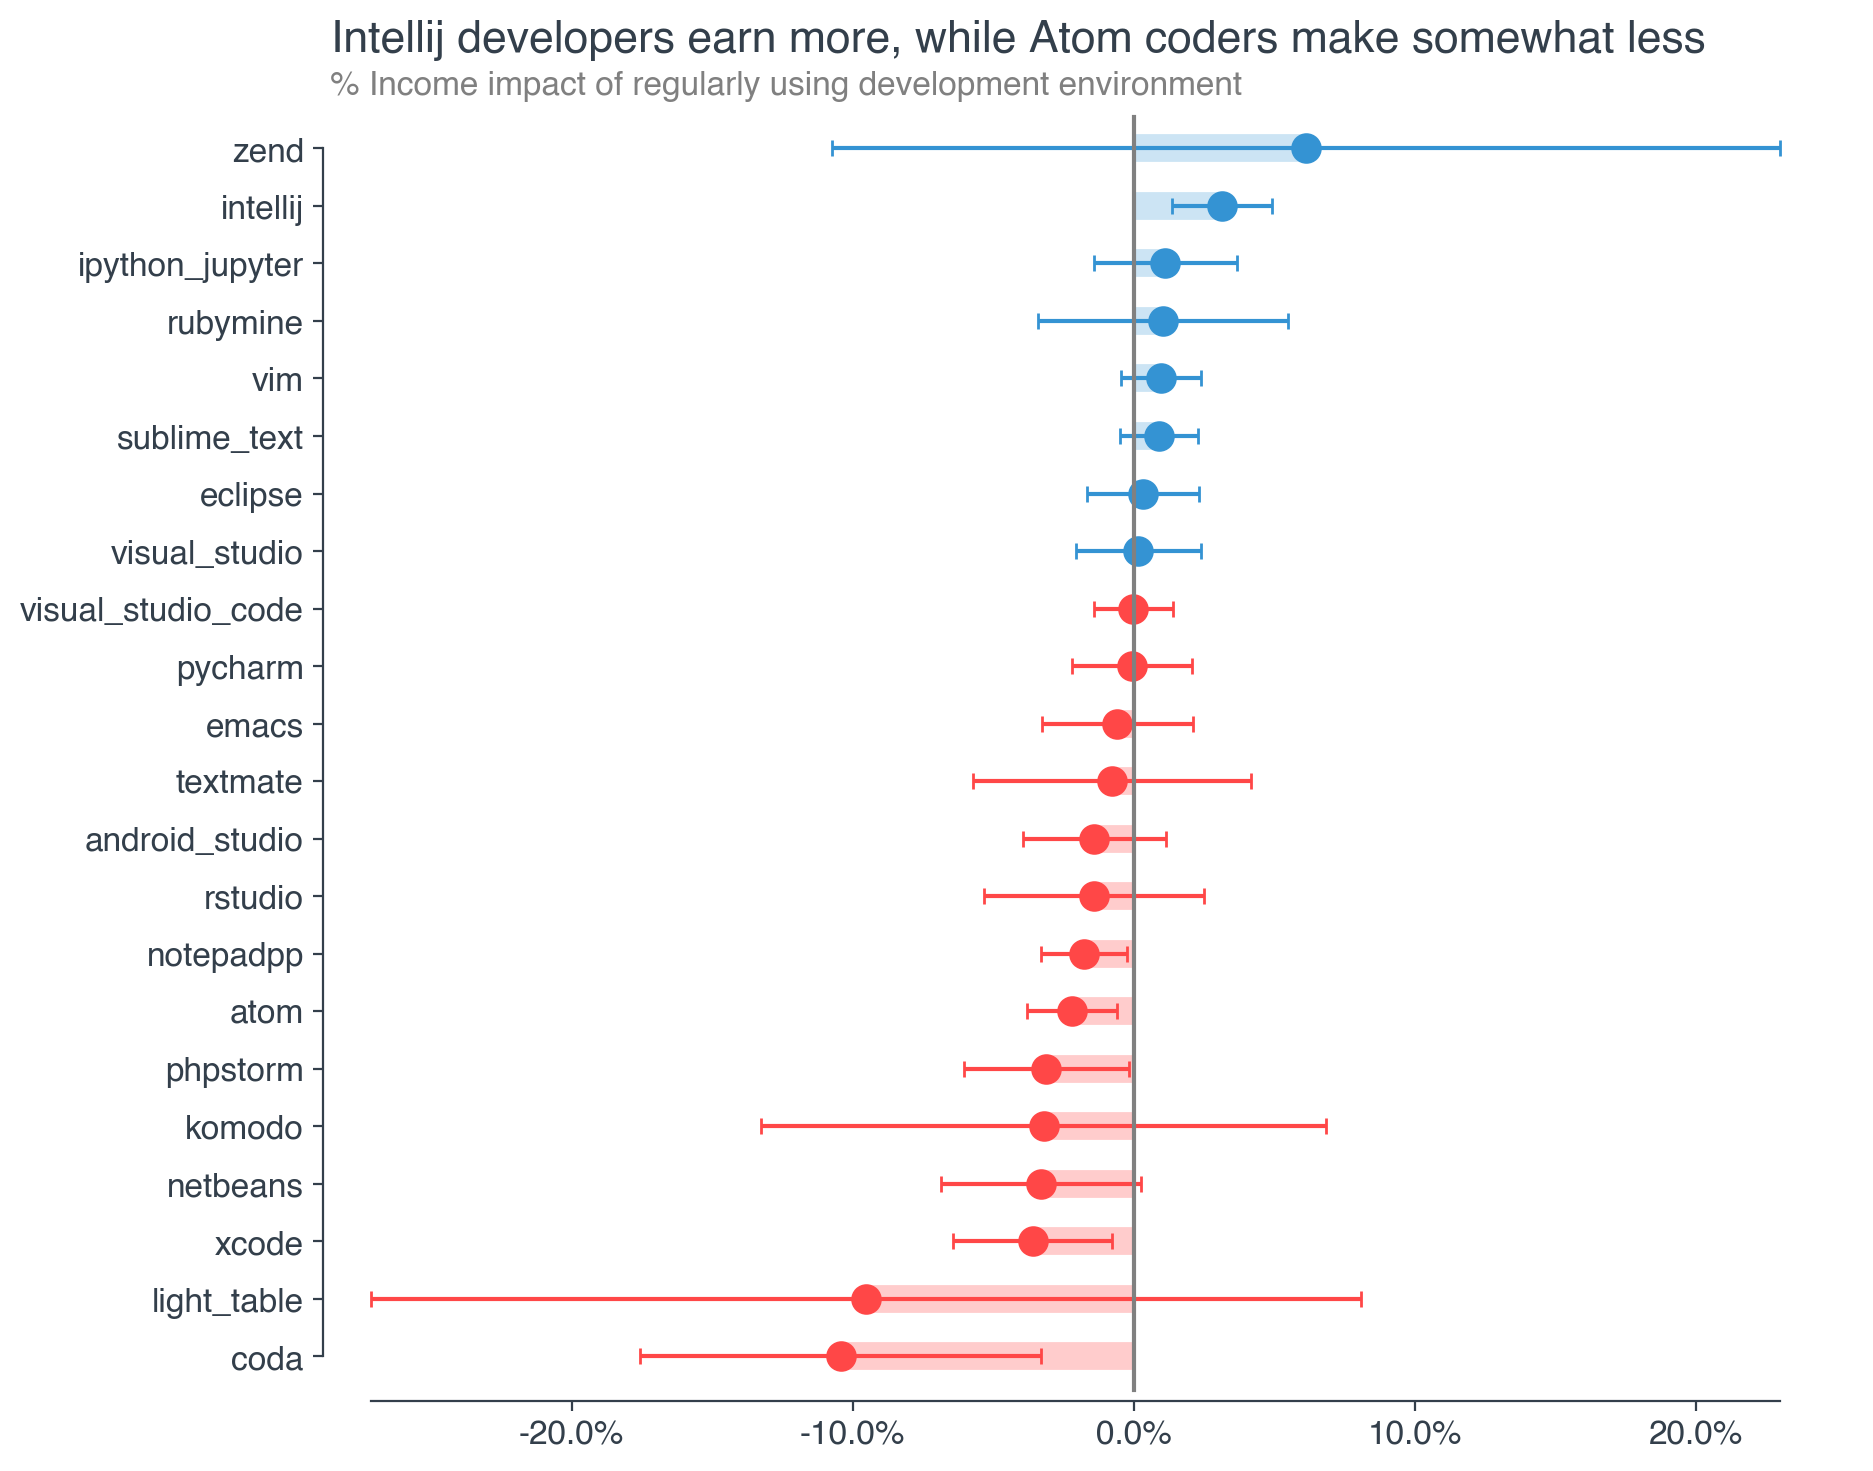

In [20]:
category = "IDE"
category_clean = "IDE / Text Editors Used Regularly"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Intellij developers earn more, while Atom coders make somewhat less", x = 0.02, y = 1.015, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of regularly using development environment", x = 0.14, y = .89, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

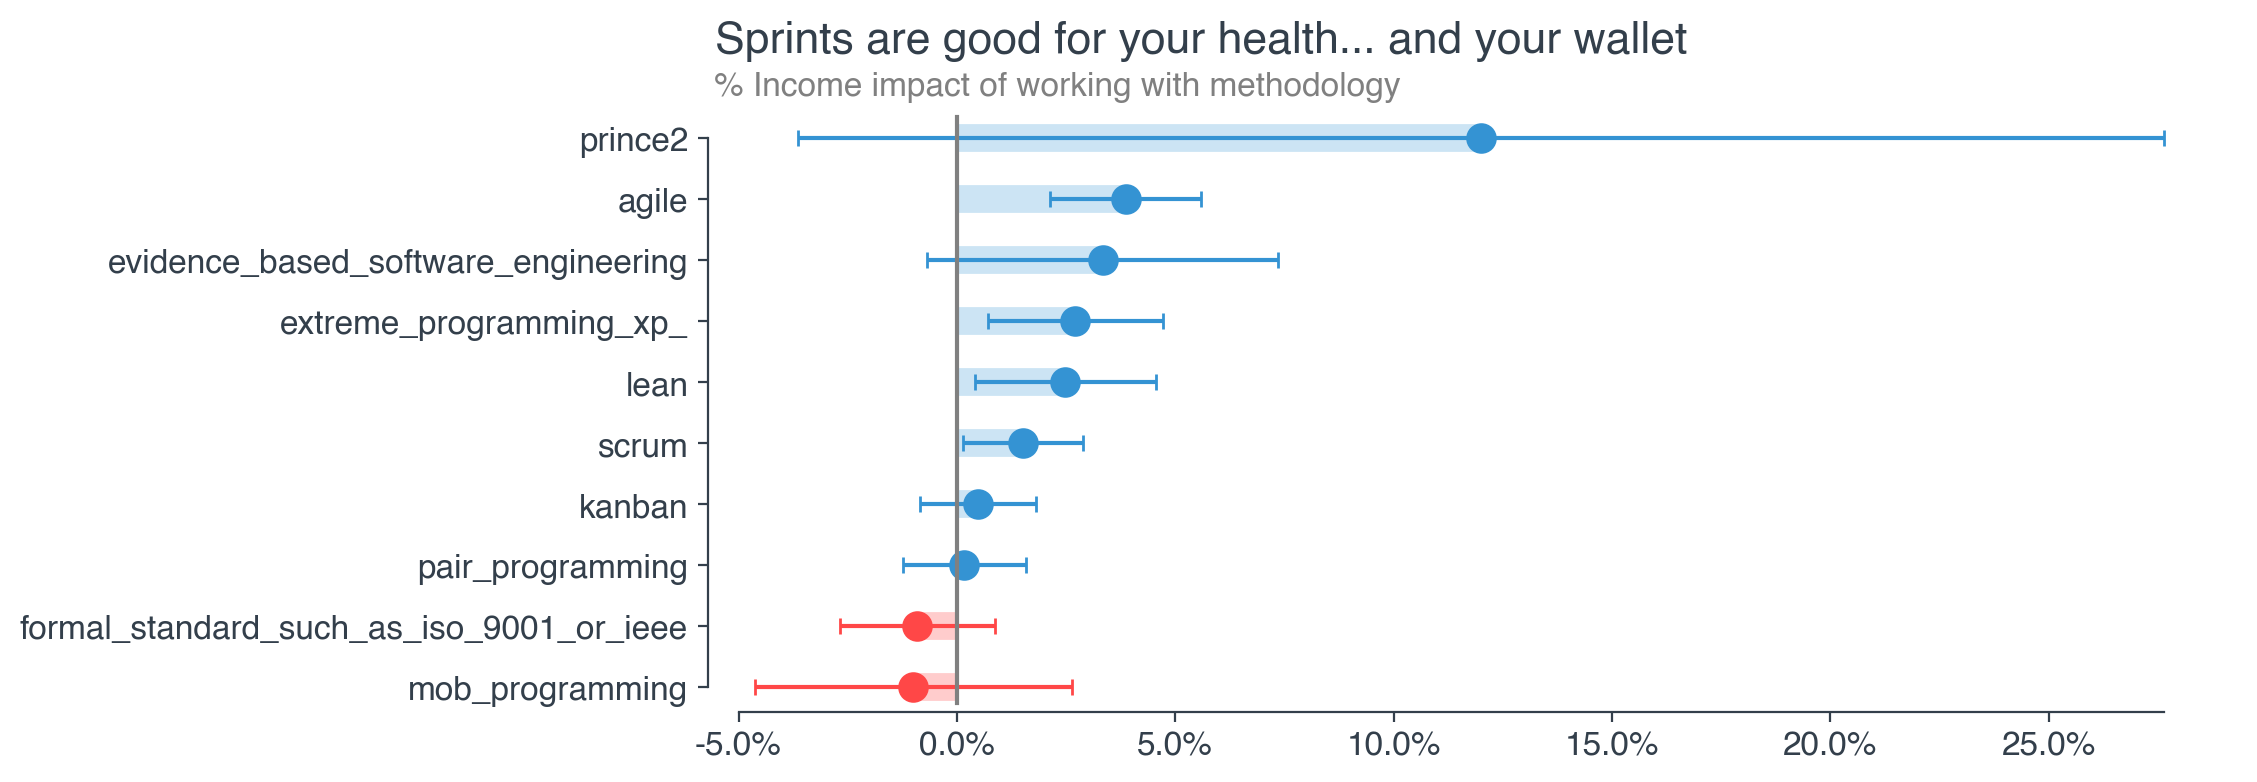

In [21]:
category = "Methodology"
category_clean = "Experience with Project Management Methodologies"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Sprints are good for your health... and your wallet", x = 0.02, y = 1.07, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of working with methodology", x = 0.14, y = .93, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

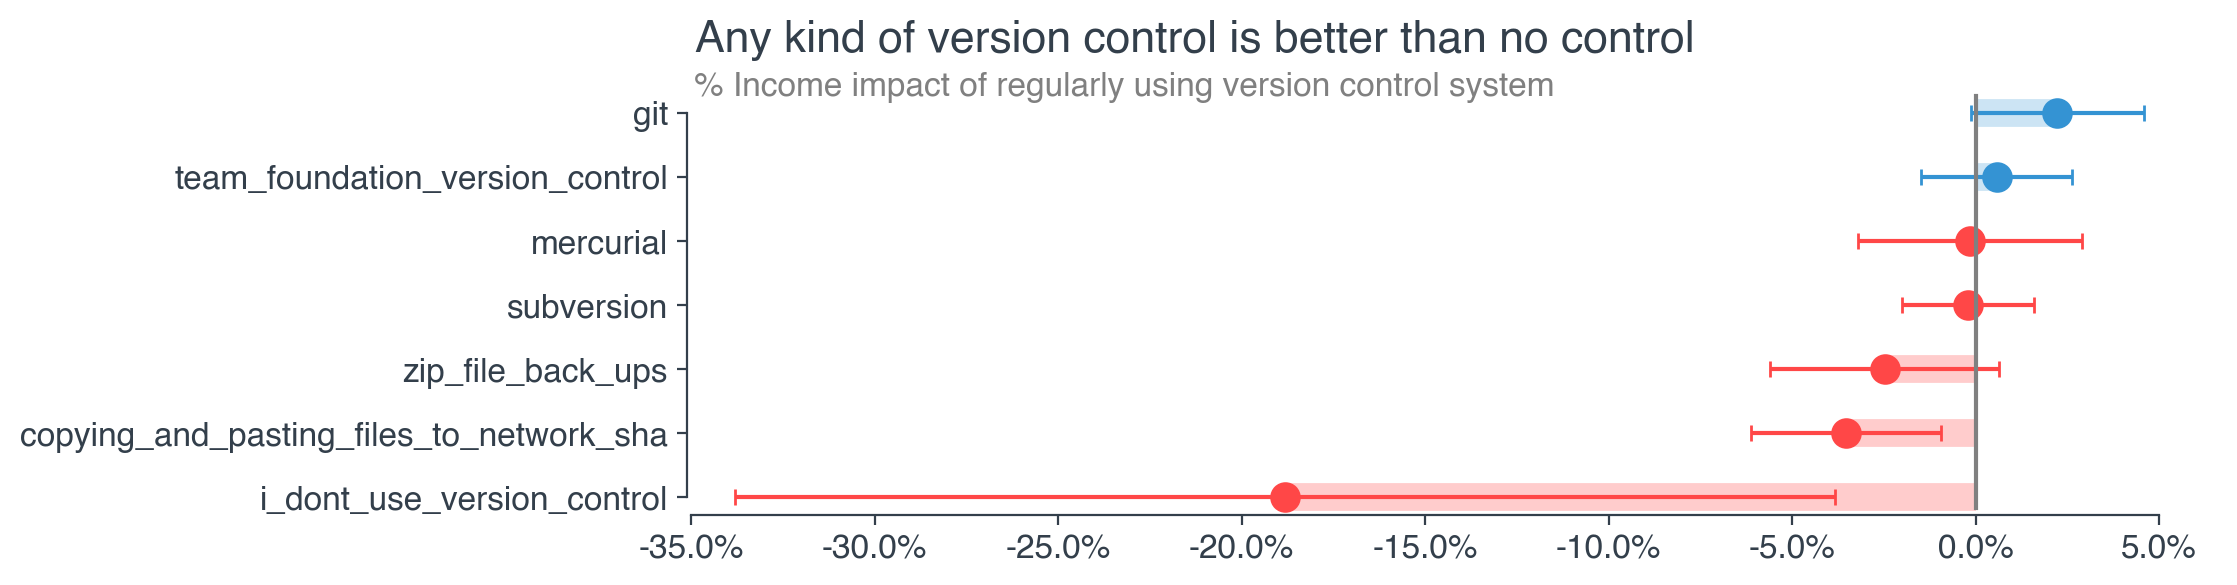

In [22]:
category = "VersionControl"
category_clean = "Version Control Systems Used Regularly"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Any kind of version control is better than no control", x = 0.02, y = 1.06, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of regularly using version control system", x = 0.14, y = .92, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

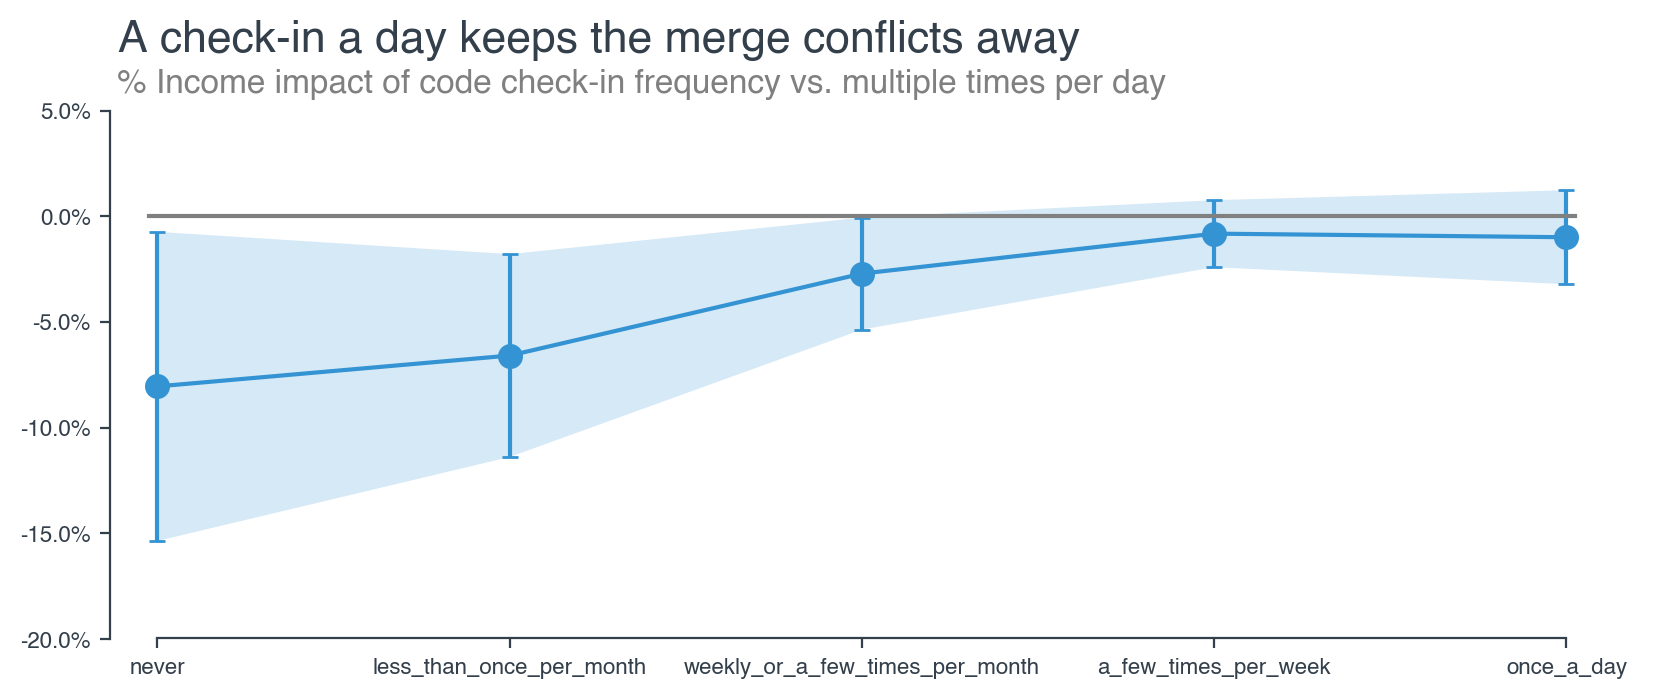

In [23]:
category = "CheckInCode"
category_clean = "Frequency of Checking-in Code"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits = ["CheckInCode_never", "CheckInCode_less_than_once_per_month", "CheckInCode_weekly_or_a_few_times_per_month", "CheckInCode_a_few_times_per_week", "CheckInCode_once_a_day"]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,3.5), dpi = 200)
plt.plot(my_range, results_df.reindex(traits)["coef"], "o-", markersize=8, color='#3493d3', alpha=1)
plt.ylim(-.2,.05)
plt.errorbar(y = results_df.reindex(traits)["coef"], x = my_range, yerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
ax.set_ylabel('')
plt.axhline(y = 0, xmin = 0.04, xmax = 0.96, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_yticklabels(['{:,.1%}'.format(y) for y in ax.get_yticks()])
plt.xticks(my_range, traits_clean)
plt.title("A check-in a day keeps the merge conflicts away", x = 0.02, y = 1.08, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of code check-in frequency vs. multiple times per day", x = 0.14, y = .94, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.fill_between(my_range, results_df.reindex(traits)["coef"] - results_df['std_error'][traits]*1.96, results_df.reindex(traits)["coef"] + results_df['std_error'][traits]*1.96, facecolor="#3493d3", alpha = 0.2)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(False)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

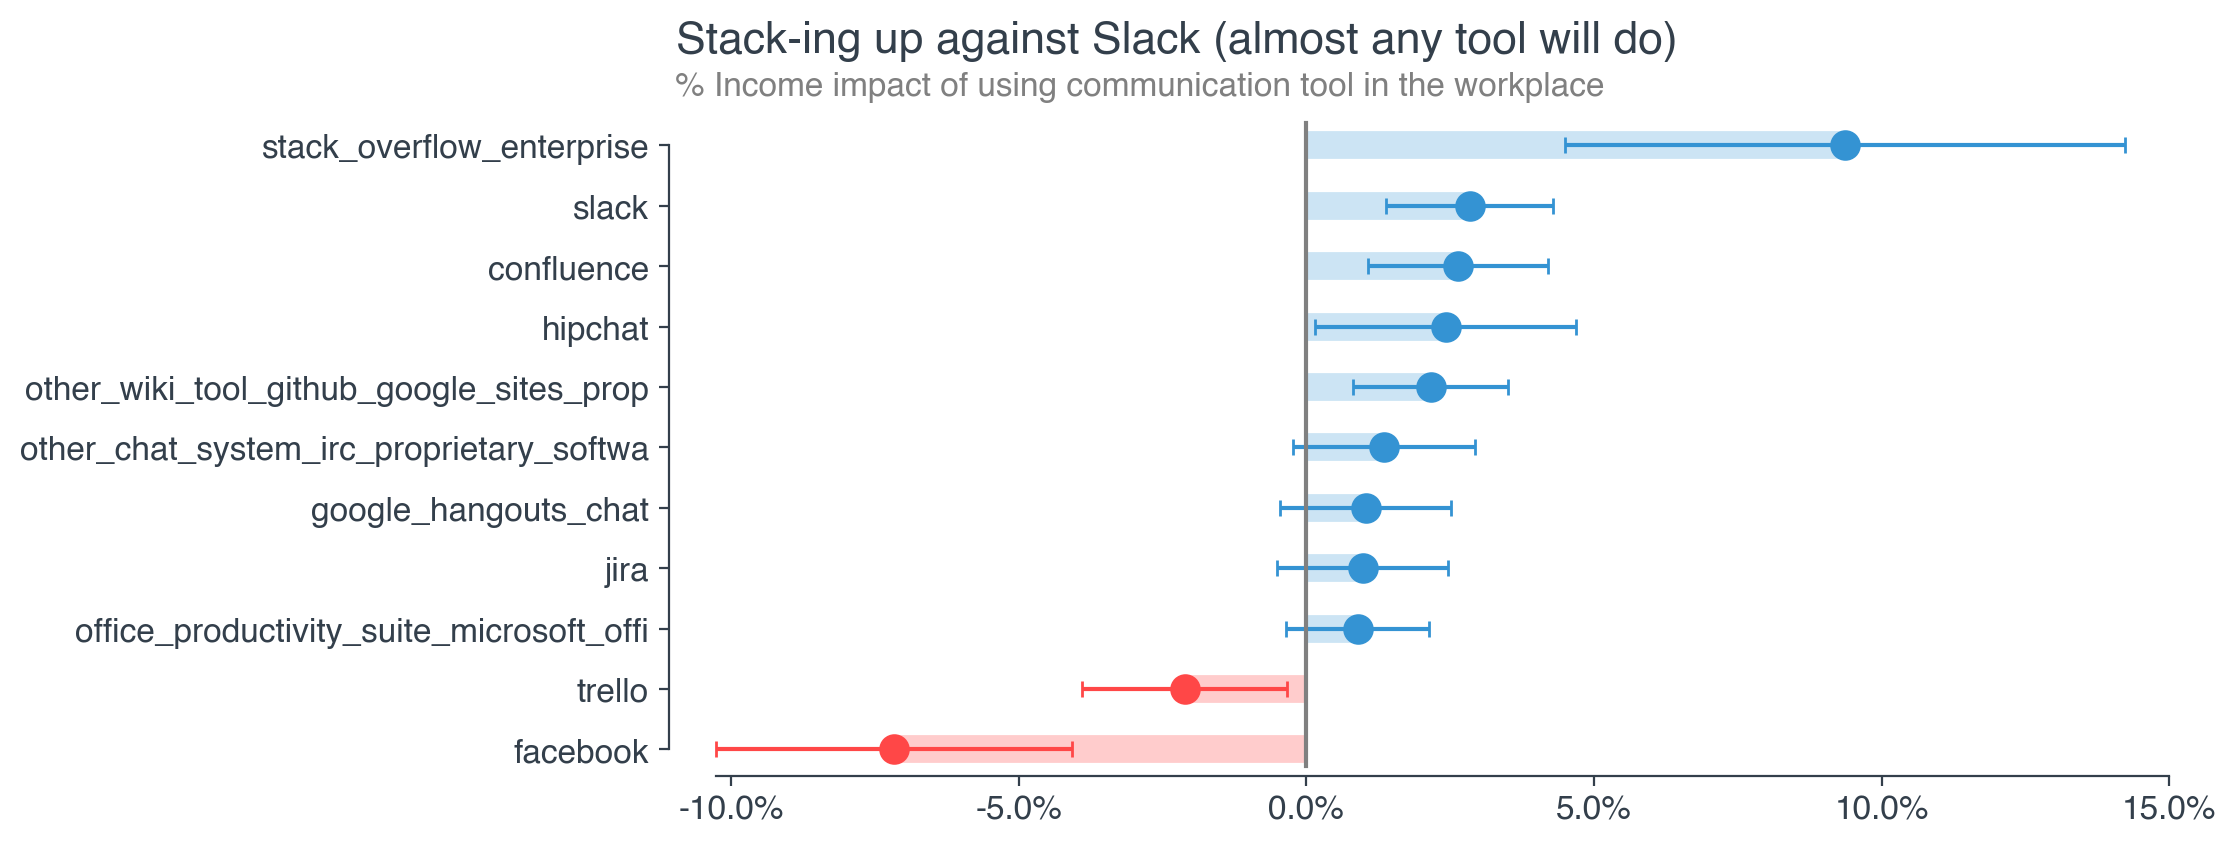

In [24]:
category = "CommunicationTools"
category_clean = "Communication Tools Used in the Workplace"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Stack-ing up against Slack (almost any tool will do)", x = 0.02, y = 1.07, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of using communication tool in the workplace", x = 0.14, y = .93, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

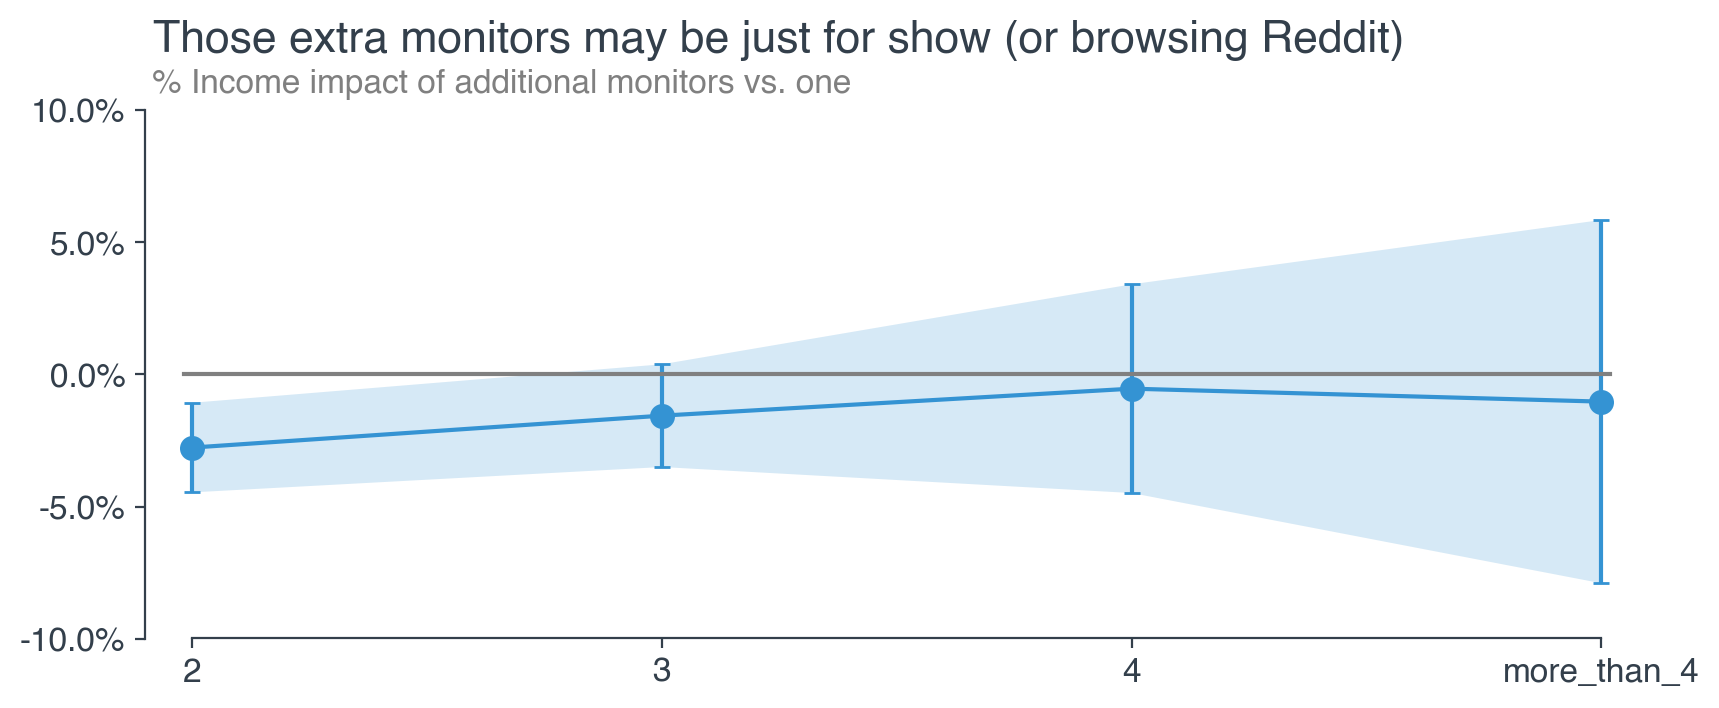

In [25]:
category = "NumberMonitors"
category_clean = "Number of Monitors"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits = ["NumberMonitors_2", "NumberMonitors_3", "NumberMonitors_4", "NumberMonitors_more_than_4"]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,3.5), dpi = 200)
plt.plot(my_range, results_df.reindex(traits)["coef"], "o-", markersize=8, color='#3493d3', alpha=1)
plt.ylim(-.1,.1)
plt.errorbar(y = results_df.reindex(traits)["coef"], x = my_range, yerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
ax.set_ylabel('')
plt.axhline(y = 0, xmin = 0.04, xmax = 0.96, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticklabels(['{:,.1%}'.format(y) for y in ax.get_yticks()])
plt.xticks(my_range, traits_clean)
plt.title("Those extra monitors may be just for show (or browsing Reddit)", x = 0.02, y = 1.08, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of additional monitors vs. one", x = 0.14, y = .94, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.fill_between(my_range, results_df.reindex(traits)["coef"] - results_df['std_error'][traits]*1.96, results_df.reindex(traits)["coef"] + results_df['std_error'][traits]*1.96, facecolor="#3493d3", alpha = 0.2)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(False)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

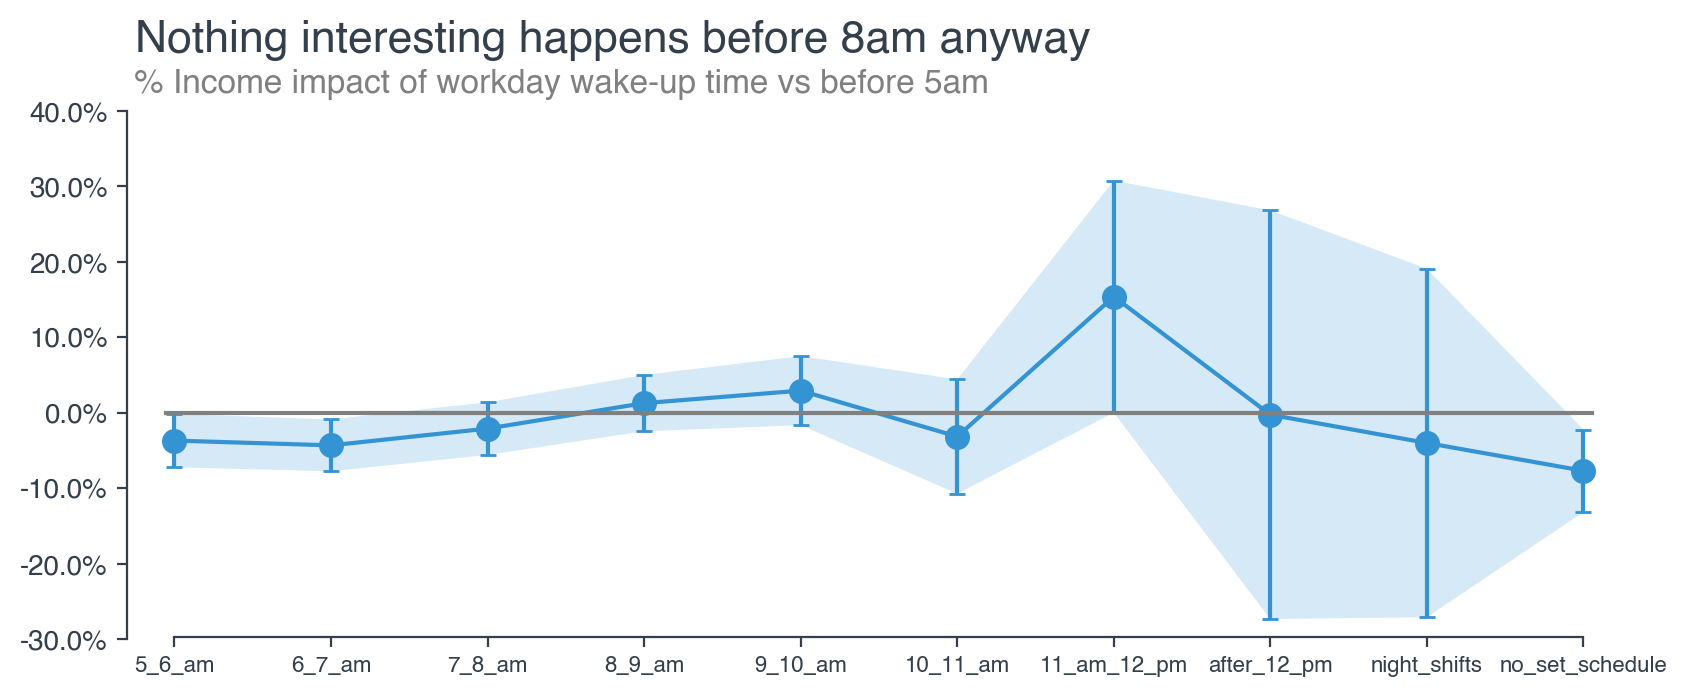

In [26]:
category = "WakeTime"
category_clean = "Wake-up Time on Workdays"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits = ["WakeTime_between_5_00_6_00_am", "WakeTime_between_6_01_7_00_am", "WakeTime_between_7_01_8_00_am", "WakeTime_between_8_01_9_00_am", "WakeTime_between_9_01_10_00_am", "WakeTime_between_10_01_11_00_am", "WakeTime_between_11_01_am_12_00_pm", "WakeTime_after_12_01_pm", "WakeTime_i_work_night_shifts", "WakeTime_i_do_not_have_a_set_schedule"]
traits_clean = ["5_6_am", "6_7_am", "7_8_am", "8_9_am", "9_10_am", "10_11_am", "11_am_12_pm", "after_12_pm", "night_shifts", "no_set_schedule"]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,3.5), dpi = 200)
plt.plot(my_range, results_df.reindex(traits)["coef"], "o-", markersize=8, color='#3493d3', alpha=1)
plt.ylim(-.3,.4)
plt.errorbar(y = results_df.reindex(traits)["coef"], x = my_range, yerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
ax.set_ylabel('')
plt.axhline(y = 0, xmin = 0.04, xmax = 0.96, color = "grey", linestyle = "-")
ax.tick_params(axis='x', which='major', labelsize=8)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.set_yticklabels(['{:,.1%}'.format(y) for y in ax.get_yticks()])
plt.xticks(my_range, traits_clean)
plt.title("Nothing interesting happens before 8am anyway", x = 0.02, y = 1.08, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of workday wake-up time vs before 5am", x = 0.14, y = .94, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.fill_between(my_range, results_df.reindex(traits)["coef"] - results_df['std_error'][traits]*1.96, results_df.reindex(traits)["coef"] + results_df['std_error'][traits]*1.96, facecolor="#3493d3", alpha = 0.2)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(False)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

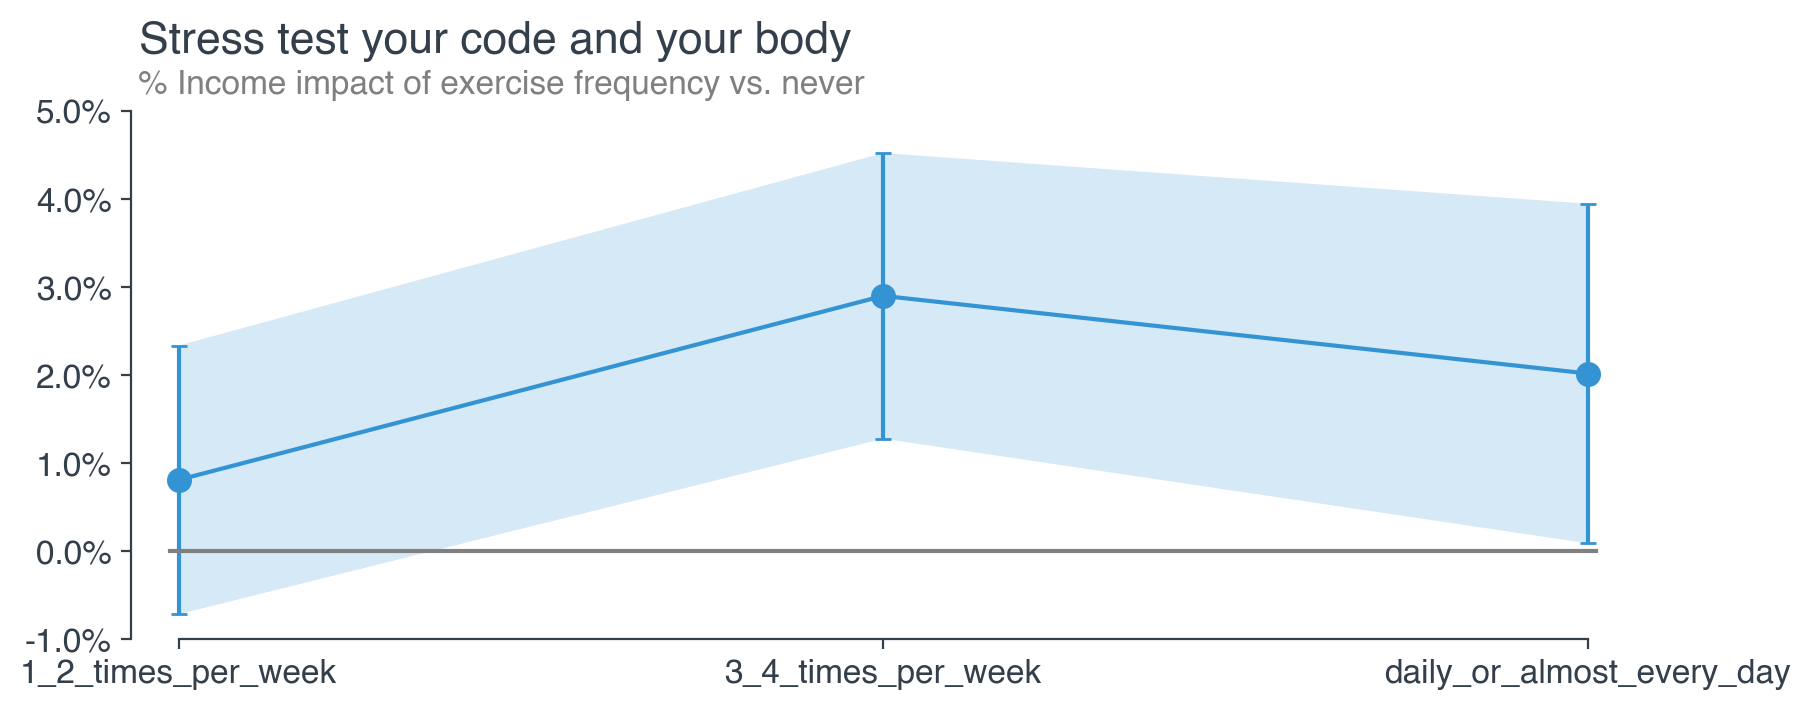

In [27]:
category = "Exercise"
category_clean = "Exercise Frequency"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits = ["Exercise_1_2_times_per_week", "Exercise_3_4_times_per_week", "Exercise_daily_or_almost_every_day"]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,3.5), dpi = 200)
plt.plot(my_range, results_df.reindex(traits)["coef"], "o-", markersize=8, color='#3493d3', alpha=1)
plt.ylim(-.01,.05)
plt.errorbar(y = results_df.reindex(traits)["coef"], x = my_range, yerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
ax.set_ylabel('')
plt.axhline(y = 0, xmin = 0.04, xmax = 0.96, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticklabels(['{:,.1%}'.format(y) for y in ax.get_yticks()])
plt.xticks(my_range, traits_clean)
plt.title("Stress test your code and your body", x = 0.02, y = 1.08, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of exercise frequency vs. never", x = 0.14, y = .94, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.fill_between(my_range, results_df.reindex(traits)["coef"] - results_df['std_error'][traits]*1.96, results_df.reindex(traits)["coef"] + results_df['std_error'][traits]*1.96, facecolor="#3493d3", alpha = 0.2)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(False)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

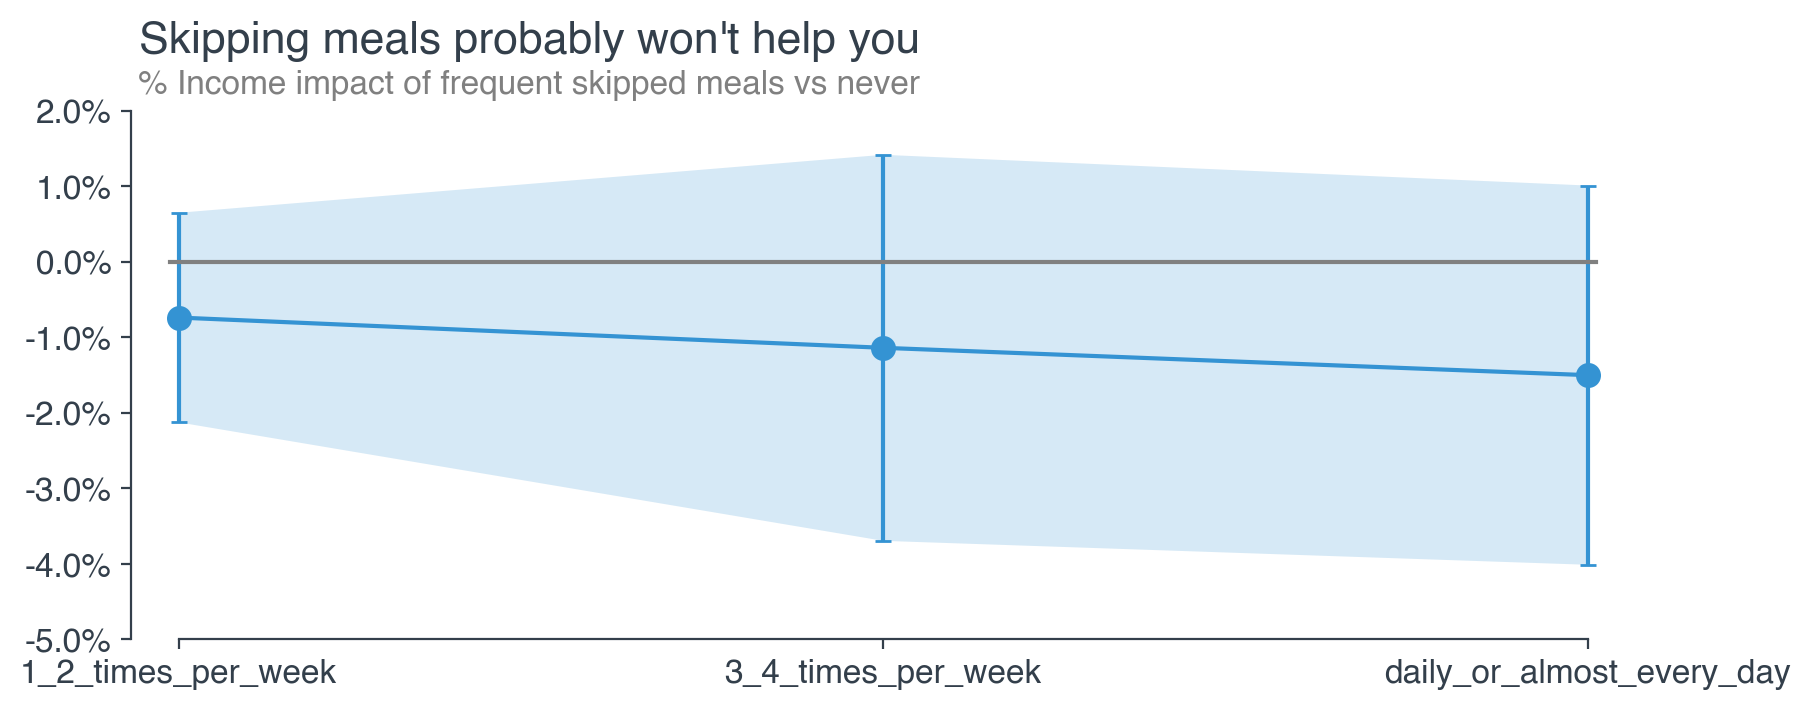

In [28]:
category = "SkipMeals"
category_clean = "Meals Skipped per Week"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits = ["SkipMeals_1_2_times_per_week", "SkipMeals_3_4_times_per_week", "SkipMeals_daily_or_almost_every_day"]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,3.5), dpi = 200)
plt.plot(my_range, results_df.reindex(traits)["coef"], "o-", markersize=8, color='#3493d3', alpha=1)
plt.ylim(-.05,.02)
plt.errorbar(y = results_df.reindex(traits)["coef"], x = my_range, yerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
ax.set_ylabel('')
plt.axhline(y = 0, xmin = 0.04, xmax = 0.96, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticklabels(['{:,.1%}'.format(y) for y in ax.get_yticks()])
plt.xticks(my_range, traits_clean)
plt.title("Skipping meals probably won't help you", x = 0.02, y = 1.08, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of frequent skipped meals vs never", x = 0.14, y = .94, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.fill_between(my_range, results_df.reindex(traits)["coef"] - results_df['std_error'][traits]*1.96, results_df.reindex(traits)["coef"] + results_df['std_error'][traits]*1.96, facecolor="#3493d3", alpha = 0.2)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(False)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

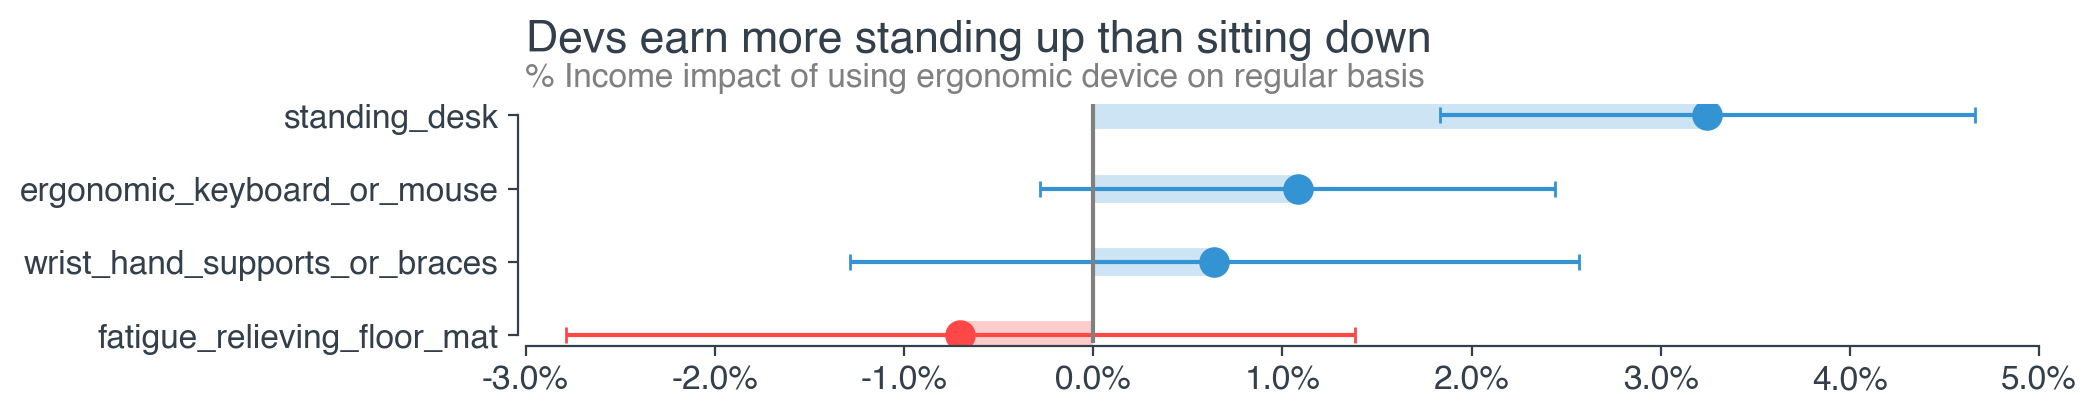

In [29]:
category = "ErgonomicDevices"
category_clean = "Ergonomic Devies"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,len(traits) * .4), dpi = 200)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] > 0].reindex(traits)["coef"], color='#007acc', alpha=0.2, linewidth=10)
plt.hlines(y=my_range, xmin=0, xmax=results_df[results_df["coef"] <= 0].reindex(traits)["coef"], color='red', alpha=0.2, linewidth=10)
plt.plot(results_df[results_df["coef"] > 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#3493d3', alpha=1)
plt.plot(results_df[results_df["coef"] <= 0].reindex(traits)["coef"], my_range, "o", markersize=10, color='#ff4747', alpha=1)
plt.errorbar(x = results_df[results_df["coef"] > 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
plt.errorbar(x = results_df[results_df["coef"] <= 0].reindex(traits)["coef"], y = my_range, xerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#ff4747', alpha = 1)
ax.set_ylabel('')
plt.axvline(x = 0, ymin = .02, ymax = 1 - len(my_range)/1000, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
plt.yticks(my_range, traits_clean)
plt.title("Devs earn more standing up than sitting down", x = 0.02, y = 1.15, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of using ergonomic device on regular basis", x = 0.14, y = 1.01, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

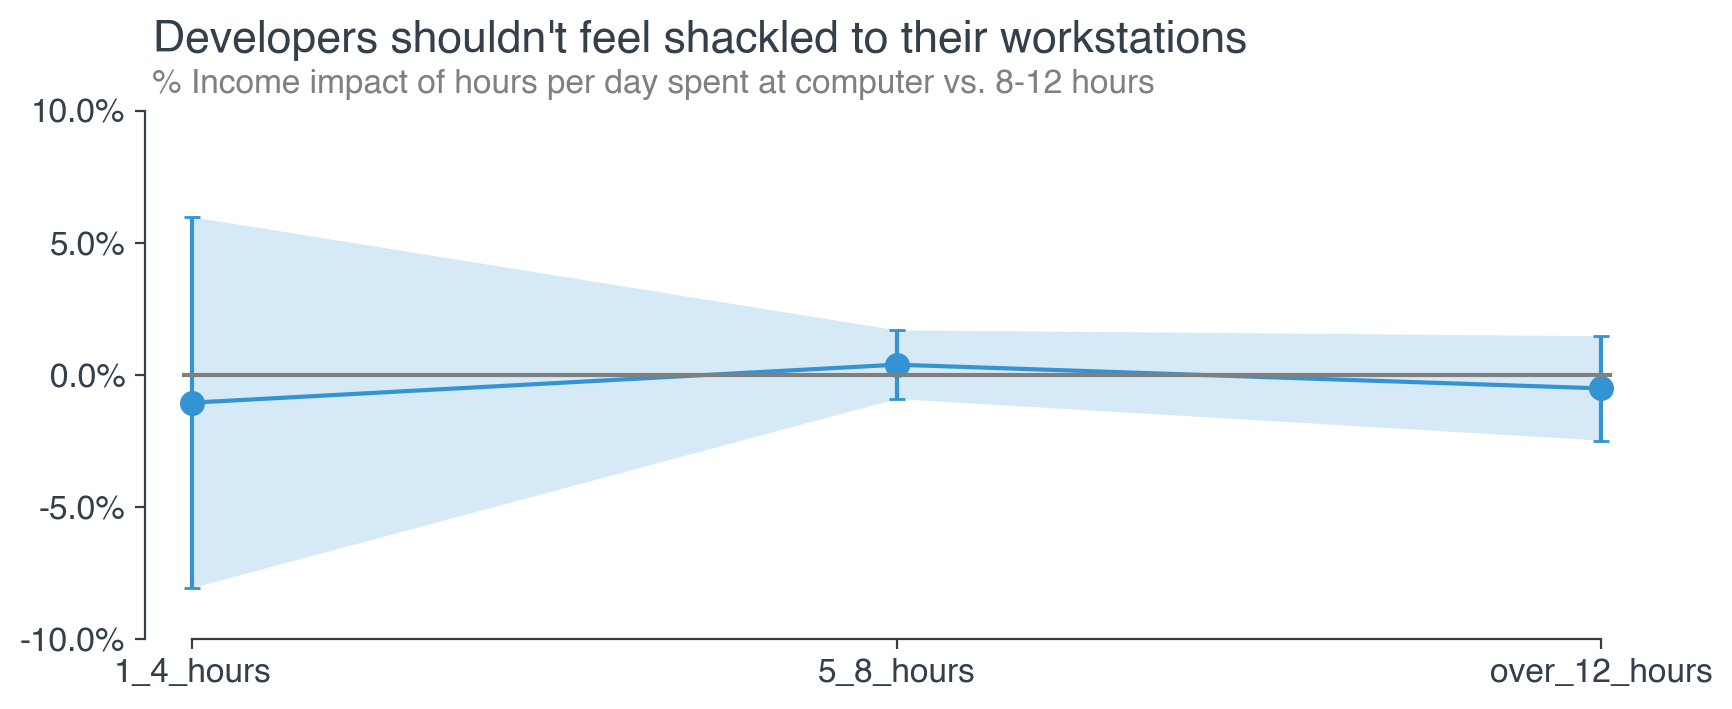

In [30]:
category = "HoursComputer"
category_clean = "Hours Per Day Spent at Computer"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits = ["HoursComputer_1_4_hours", "HoursComputer_5_8_hours", "HoursComputer_over_12_hours"]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,3.5), dpi = 200)
plt.plot(my_range, results_df.reindex(traits)["coef"], "o-", markersize=8, color='#3493d3', alpha=1)
plt.ylim(-.1,.1)
plt.errorbar(y = results_df.reindex(traits)["coef"], x = my_range, yerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
ax.set_ylabel('')
plt.axhline(y = 0, xmin = 0.04, xmax = 0.96, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticklabels(['{:,.1%}'.format(y) for y in ax.get_yticks()])
plt.xticks(my_range, traits_clean)
plt.title("Developers shouldn't feel shackled to their workstations", x = 0.02, y = 1.08, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of hours per day spent at computer vs. 8-12 hours", x = 0.14, y = .94, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.fill_between(my_range, results_df.reindex(traits)["coef"] - results_df['std_error'][traits]*1.96, results_df.reindex(traits)["coef"] + results_df['std_error'][traits]*1.96, facecolor="#3493d3", alpha = 0.2)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(False)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")

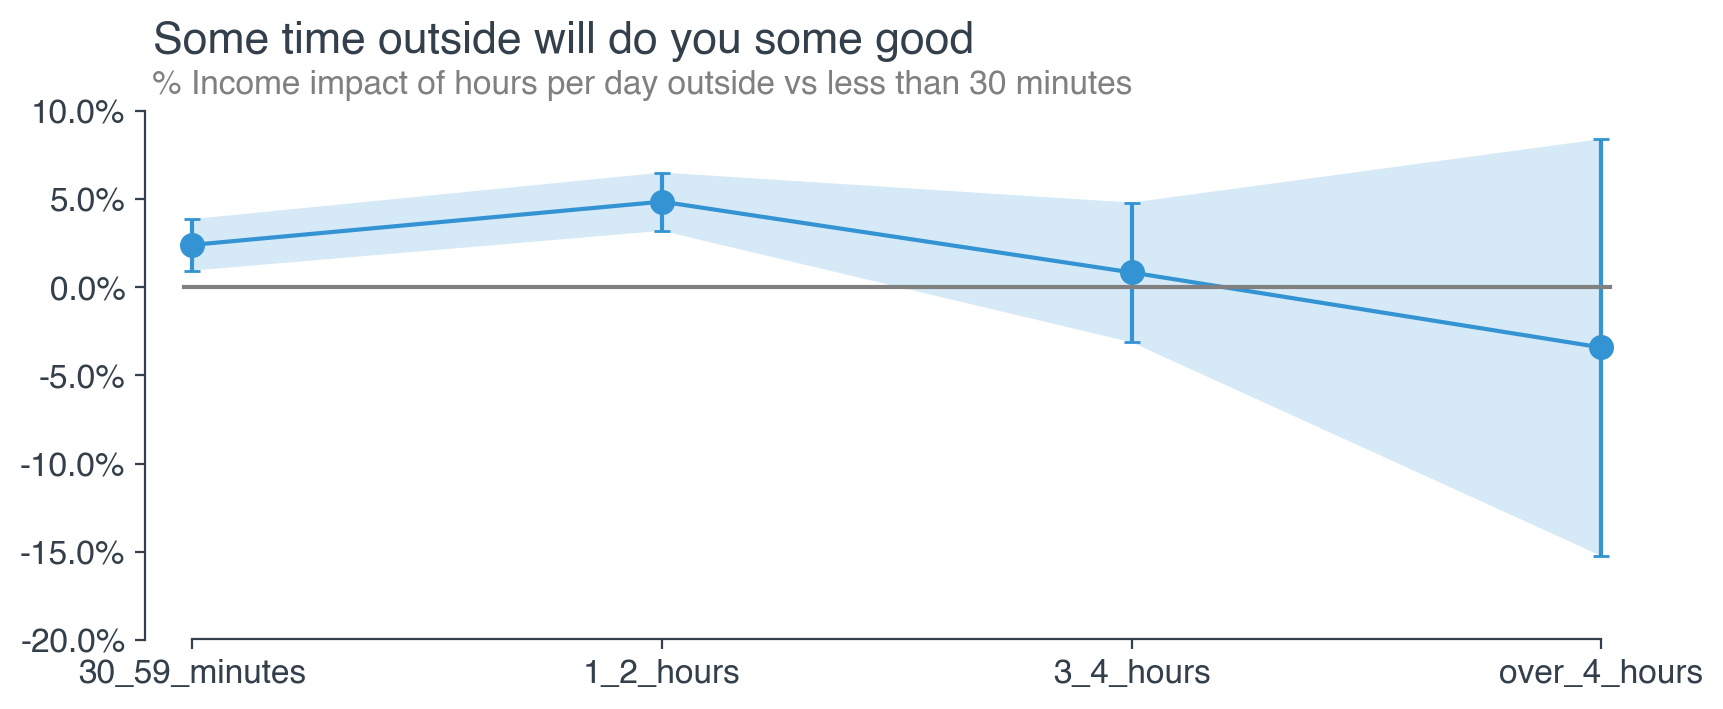

In [31]:
category = "HoursOutside"
category_clean = "Hours Per Day Spent Outside"
traits = [x for x in results_df.sort_values(by = "coef", ascending = True).index if category in x]
traits = ["HoursOutside_30_59_minutes", "HoursOutside_1_2_hours", "HoursOutside_3_4_hours", "HoursOutside_over_4_hours"]
traits_clean = [x[len(category)+1:len(category)+41] for x in traits]
my_range=list(range(1,len(traits)+1))

fig, ax = plt.subplots(figsize=(10,3.5), dpi = 200)
plt.plot(my_range, results_df.reindex(traits)["coef"], "o-", markersize=8, color='#3493d3', alpha=1)
plt.ylim(-.2,.1)
plt.errorbar(y = results_df.reindex(traits)["coef"], x = my_range, yerr = results_df['std_error'][traits]*1.96, fmt = "none", color='#3493d3', alpha = 1)
ax.set_ylabel('')
plt.axhline(y = 0, xmin = 0.04, xmax = 0.96, color = "grey", linestyle = "-")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticklabels(['{:,.1%}'.format(y) for y in ax.get_yticks()])
plt.xticks(my_range, traits_clean)
plt.title("Some time outside will do you some good", x = 0.02, y = 1.08, horizontalalignment = "left", fontsize = 16, fontstyle="oblique", color = '#333F4B')
plt.suptitle("% Income impact of hours per day outside vs less than 30 minutes", x = 0.14, y = .94, horizontalalignment = "left", fontsize = 12, fontstyle="oblique", color = 'grey')
ax.fill_between(my_range, results_df.reindex(traits)["coef"] - results_df['std_error'][traits]*1.96, results_df.reindex(traits)["coef"] + results_df['std_error'][traits]*1.96, facecolor="#3493d3", alpha = 0.2)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(False)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', len(traits) / 1800))
ax.spines['left'].set_position(('axes', 0.015))
fig.set_facecolor("white")